Research questions:


1.  What is the effect of the number of participations across different seasons for each individual in winning medals?(for example if some players played in 5 olympics, in which olympics they reached their peak performance on average)
2.  The effect of age, weight, and height on winning medals in each sport?
3.  The relation between the hosting city and the winning teams? (has to modify the dataset in order to be able to tell which city belongs to which country)
4.  The relation between the hosting continents and the winning teams? (to see if a country playing in a city in the same continent improve its chances in winning medals)
5.  What are the sports with the highest/lowest average bmi among its medalists.
6.  What is the effect of the number of participants for each country on their win rate?
7.  What is the effect of the number of events a player participates in each year on his chances in winning medals (whether a player participating in multiple events in the same season increase/decrease/have no effect on him winning medals)?
8.  the trends in medalists (for example in tennis there was an observation that the average height of the top players is growing steadily in the last 20 years, so we will see whether these trends are also present in the olympics)
9. the performance of each continent in each season.
10. The countries with the worst participations-to-medals ratio.
11. Which gender is more dominant in each country?
 





In [337]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.ticker import PercentFormatter
from scipy import stats
from scipy.stats import pearsonr

In [338]:
df_olympics = pd.read_csv("athlete_events.csv")
df_olympics.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


# Milestone1

## EDA

The shape of our dataset

In [339]:
df_olympics.shape

(271116, 15)

In [340]:
df_olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [341]:
df_olympics.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [342]:
df_olympics['Medal'].value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [343]:
df_olympics.nunique()

ID        135571
Name      134732
Sex            2
Age           74
Height        95
Weight       220
Team        1184
NOC          230
Games         51
Year          35
Season         2
City          42
Sport         66
Event        765
Medal          3
dtype: int64

In [344]:
df_olympics.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

## Data Cleaning

As we can see we have 3%, 22% and 23% of the age, height and weight missing respectively.

In [345]:
df_olympics.isna().sum()/df_olympics.shape[0]

ID        0.000000
Name      0.000000
Sex       0.000000
Age       0.034944
Height    0.221938
Weight    0.231912
Team      0.000000
NOC       0.000000
Games     0.000000
Year      0.000000
Season    0.000000
City      0.000000
Sport     0.000000
Event     0.000000
Medal     0.853262
dtype: float64

In [346]:
df_olympics["Age"] = df_olympics["Age"].astype(float)
df_olympics["Height"] = df_olympics["Height"].astype(float)
df_olympics["Weight"] = df_olympics["Weight"].astype(float)

Age (Handling outliers then missing values)

C:\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Age')

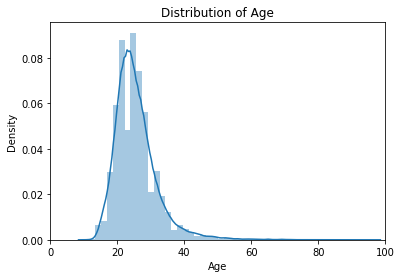

In [347]:
ageDistribution=sns.distplot(df_olympics["Age"])
ageDistribution.set(xlim=(0, 100))
ageDistribution.set_title("Distribution of Age")

C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of Age')

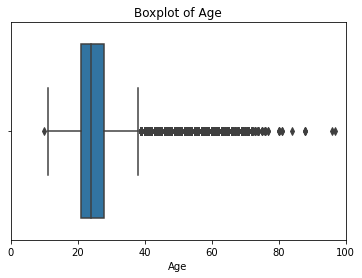

In [348]:
ageBox=sns.boxplot(df_olympics["Age"])
ageBox.set(xlim=(0, 100))
ageBox.set_title("Boxplot of Age")

We will handle the outliers by checking whether each athlete is an outlier within his/her sport and gender only using the zscore, and then we will replace the value by the mean of this sport and gender.

In [349]:
from scipy import stats
Gender_Sport=df_olympics.groupby(["Sex","Sport"])
keys = Gender_Sport.groups.keys()
for gender,sport in keys:
    df_players_gender_sport=df_olympics[ (df_olympics["Sex"]==gender) & (df_olympics["Sport"]==sport)].drop_duplicates(subset=['ID'])
    df_players_gender_sport = df_players_gender_sport.dropna(subset=['Age'])
    z_age=np.abs(stats.zscore(df_players_gender_sport['Age']))
    df_not_outliers = df_players_gender_sport[(z_age < 2)]
    outliers=(z_age >= 2)
    filtered_entries = z_age < 2
    df_zscore_filter = df_players_gender_sport[filtered_entries]
    meanAge=df_not_outliers["Age"].mean()
    df_players_gender_sport.loc[outliers,"Age"]=meanAge

    #get all outliers in a single dataframe with age altered
    inside = df_players_gender_sport[df_players_gender_sport["Age"] == meanAge]
    #Replace all values with ID in inside with the mean age in the original dataframe
    df_olympics.loc[df_olympics.ID.isin(inside.ID),"Age"] = meanAge



We are calculating the mean by aggregating using the gender and sport, and then we calculate the mean for each missing age

In [350]:
Sex_Sport_Age = df_olympics.groupby(["Sex","Sport"])["Age"].mean()
df_olympics.loc[df_olympics['Sex'] == "F", "Age"] = df_olympics['Age'].fillna(df_olympics.loc[df_olympics['Sex'] == "F"]["Sport"].map(Sex_Sport_Age[('F',)]))
df_olympics.loc[df_olympics['Sex'] == "M", "Age"] = df_olympics['Age'].fillna(df_olympics.loc[df_olympics['Sex'] == "M"]["Sport"].map(Sex_Sport_Age[('M',)]))

C:\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Age after handling outliers and missing values')

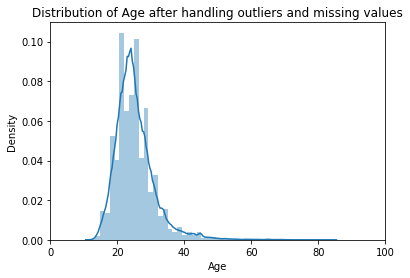

In [351]:
ageDistribution=sns.distplot(df_olympics["Age"])
ageDistribution.set(xlim=(0, 100))
ageDistribution.set_title("Distribution of Age after handling outliers and missing values")

C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of Age after handling outliers and missing values')

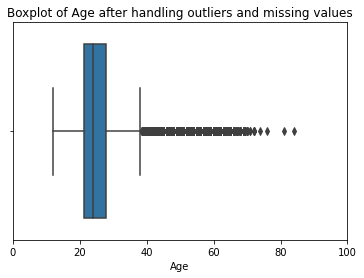

In [352]:
ageBox=sns.boxplot(df_olympics["Age"])
ageBox.set(xlim=(0, 100))
ageBox.set_title("Boxplot of Age after handling outliers and missing values")

In [353]:
df_olympics.isna().sum()/df_olympics.shape[0]

ID        0.000000
Name      0.000000
Sex       0.000000
Age       0.000000
Height    0.221938
Weight    0.231912
Team      0.000000
NOC       0.000000
Games     0.000000
Year      0.000000
Season    0.000000
City      0.000000
Sport     0.000000
Event     0.000000
Medal     0.853262
dtype: float64

Weight

C:\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Weight')

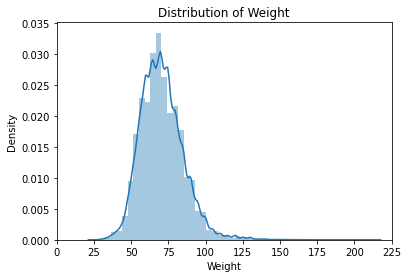

In [354]:
weightDistribution=sns.distplot(df_olympics["Weight"])
weightDistribution.set(xlim=(0, 225))
weightDistribution.set_title("Distribution of Weight")

C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of Weight')

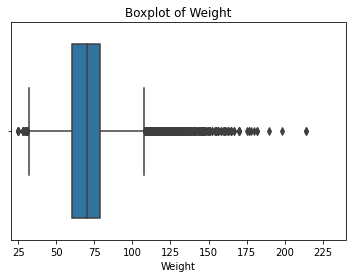

In [355]:
weightBox=sns.boxplot(df_olympics["Weight"])
weightBox.set(xlim=(20, 240))
weightBox.set_title("Boxplot of Weight")

Check and replace outliers in weight.

In [356]:
from scipy import stats
Gender_Sport = df_olympics.dropna(axis=0,subset=['Weight']).groupby(["Sex","Sport"])
keys = Gender_Sport.groups.keys()
for gender,sport in keys:
    df_players_gender_sport=df_olympics[ (df_olympics["Sex"]==gender) & (df_olympics["Sport"]==sport)].drop_duplicates(subset=['ID'])
    df_players_gender_sport = df_players_gender_sport.dropna(subset=['Weight'])
    z_weight=np.abs(stats.zscore(df_players_gender_sport['Weight']))
    df_not_outliers = df_players_gender_sport[(z_weight < 2)]
    outliers=(z_weight >= 2)
    filtered_entries = z_weight <= 2
    df_zscore_filter = df_players_gender_sport[filtered_entries]
    meanWeight=df_not_outliers["Weight"].mean()
    df_players_gender_sport.loc[outliers,"Weight"]=meanWeight

    #get all outliers in a single dataframe with age altered
    inside = df_players_gender_sport[df_players_gender_sport["Weight"] == meanWeight]
    #Replace all values with ID in inside with the mean age in the original dataframe
    df_olympics.loc[df_olympics.ID.isin(inside.ID),"Weight"] = meanWeight

In [357]:
Sex_Sport_Weight = df_olympics.groupby(["Sex","Sport"])["Weight"].mean()
df_olympics.loc[df_olympics['Sex'] == "F", "Weight"] = df_olympics['Weight'].fillna(df_olympics.loc[df_olympics['Sex'] == "F"]["Sport"].map(Sex_Sport_Weight[('F',)]))
df_olympics.loc[df_olympics['Sex'] == "M", "Weight"] = df_olympics['Weight'].fillna(df_olympics.loc[df_olympics['Sex'] == "M"]["Sport"].map(Sex_Sport_Weight[('M',)]))

In [358]:
df_olympics.isna().sum()/df_olympics.shape[0]

ID        0.000000
Name      0.000000
Sex       0.000000
Age       0.000000
Height    0.221938
Weight    0.002195
Team      0.000000
NOC       0.000000
Games     0.000000
Year      0.000000
Season    0.000000
City      0.000000
Sport     0.000000
Event     0.000000
Medal     0.853262
dtype: float64

Since some sports and genders have their records in weight and height completely missing, we use the population mean of each gender to replace these missing values.

In [359]:
meanWeightMale=df_olympics.loc[df_olympics['Sex'] == "M"]["Weight"].mean()
meanWeightFemale=df_olympics.loc[df_olympics['Sex'] == "F"]["Weight"].mean()
df_olympics["Weight"]=df_olympics['Weight'].fillna(df_olympics['Sex'].map({'F':meanWeightFemale, 'M': meanWeightMale}))

C:\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Weight after handling outliers and missing values')

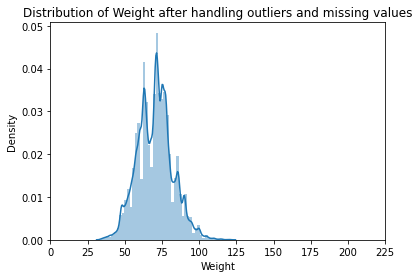

In [360]:
weightDistribution=sns.distplot(df_olympics["Weight"])
weightDistribution.set(xlim=(0, 225))
weightDistribution.set_title("Distribution of Weight after handling outliers and missing values")

C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of Weight after handling outliers and missing values')

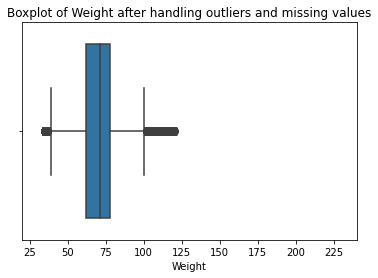

In [361]:
weightBox=sns.boxplot(df_olympics["Weight"])
weightBox.set(xlim=(20, 240))
weightBox.set_title("Boxplot of Weight after handling outliers and missing values")

Height

C:\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Height')

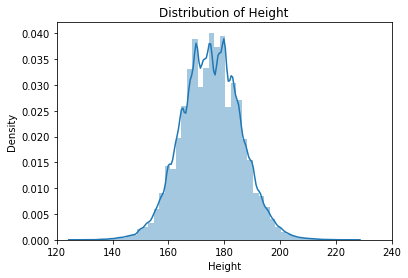

In [362]:
heightDistribution=sns.distplot(df_olympics["Height"])
heightDistribution.set(xlim=(120, 240))
heightDistribution.set_title("Distribution of Height")

C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of Height')

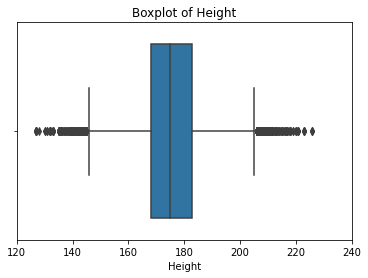

In [363]:
heightBox=sns.boxplot(df_olympics["Height"])
heightBox.set(xlim=(120, 240))
heightBox.set_title("Boxplot of Height")

In [364]:
from scipy import stats
Gender_Sport = df_olympics.dropna(subset=['Height']).groupby(["Sex","Sport"])
keys = Gender_Sport.groups.keys()
for gender,sport in keys:
    df_players_gender_sport=df_olympics[ (df_olympics["Sex"]==gender) & (df_olympics["Sport"]==sport)].drop_duplicates(subset=['ID'])
    df_players_gender_sport = df_players_gender_sport.dropna(subset=['Height'])
    z_height=np.abs(stats.zscore(df_players_gender_sport['Height']))
    df_not_outliers = df_players_gender_sport[(z_height < 2)]
    outliers=(z_height >= 2)
    filtered_entries = z_height <= 2
    df_zscore_filter = df_players_gender_sport[filtered_entries]
    meanHeight=df_not_outliers["Height"].mean()
    df_players_gender_sport.loc[outliers,"Height"]=meanHeight

    #get all outliers in a single dataframe with age altered
    inside = df_players_gender_sport[df_players_gender_sport["Height"] == meanHeight]
    #Replace all values with ID in inside with the mean age in the original dataframe
    df_olympics.loc[df_olympics.ID.isin(inside.ID),"Height"] = meanHeight

In [365]:
Sex_Sport_Height = df_olympics.groupby(["Sex","Sport"])["Height"].mean()
df_olympics.loc[df_olympics['Sex'] == "F", "Height"] = df_olympics['Height'].fillna(df_olympics.loc[df_olympics['Sex'] == "F"]["Sport"].map(Sex_Sport_Height[('F',)]))
df_olympics.loc[df_olympics['Sex'] == "M", "Height"] = df_olympics['Height'].fillna(df_olympics.loc[df_olympics['Sex'] == "M"]["Sport"].map(Sex_Sport_Height[('M',)]))

Since some sports and genders have their records in weight and height completely missing, we use the population mean of each gender to replace these missing values.

In [366]:
meanHeightMale=df_olympics.loc[df_olympics['Sex'] == "M"]["Height"].mean()
meanHeightFemale=df_olympics.loc[df_olympics['Sex'] == "F"]["Height"].mean()
df_olympics["Height"]=df_olympics['Height'].fillna(df_olympics['Sex'].map({'F':meanHeightFemale, 'M': meanHeightMale}))

C:\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Height after handling outliers and missing values')

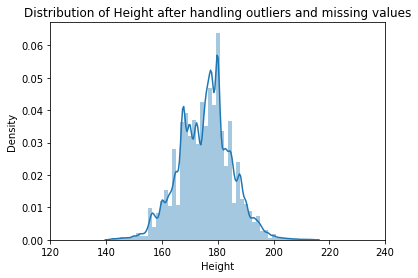

In [367]:
heightDistribution=sns.distplot(df_olympics["Height"])
heightDistribution.set(xlim=(120, 240))
heightDistribution.set_title("Distribution of Height after handling outliers and missing values")

C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of Height after handling outliers and missing values')

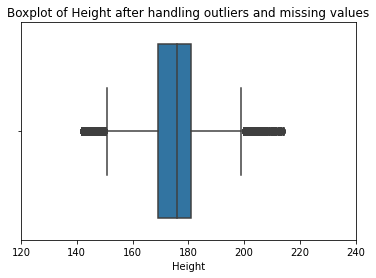

In [368]:
heightBox=sns.boxplot(df_olympics["Height"])
heightBox.set(xlim=(120, 240))
heightBox.set_title("Boxplot of Height after handling outliers and missing values")

In [369]:
df_olympics.isna().sum()/df_olympics.shape[0]

ID        0.000000
Name      0.000000
Sex       0.000000
Age       0.000000
Height    0.000000
Weight    0.000000
Team      0.000000
NOC       0.000000
Games     0.000000
Year      0.000000
Season    0.000000
City      0.000000
Sport     0.000000
Event     0.000000
Medal     0.853262
dtype: float64

Label encoding for medals

In [370]:
df_olympics['Medal'].unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [371]:
df_olympics["Medal"].replace({"Gold": 3, "Silver":2, "Bronze":1, np.nan:0}, inplace=True)
df_olympics['Medal'].unique()
df_olympics.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.000000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,M,23.0,170.000000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,3,Gunnar Nielsen Aaby,M,24.0,177.402044,72.833189,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,4,Edgar Lindenau Aabye,M,34.0,182.375000,93.629355,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,3
4,5,Christine Jacoba Aaftink,F,21.0,166.947818,61.401176,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0


## Data visualization

The number of participants from each gender in all the olympics

Text(0.5, 1.0, 'Barplot for Gender')

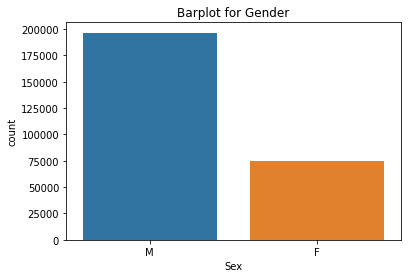

In [372]:
genderBar = sns.countplot(x="Sex", data=df_olympics)
genderBar.set_title("Barplot for Gender")

Top 10 countries by medals won

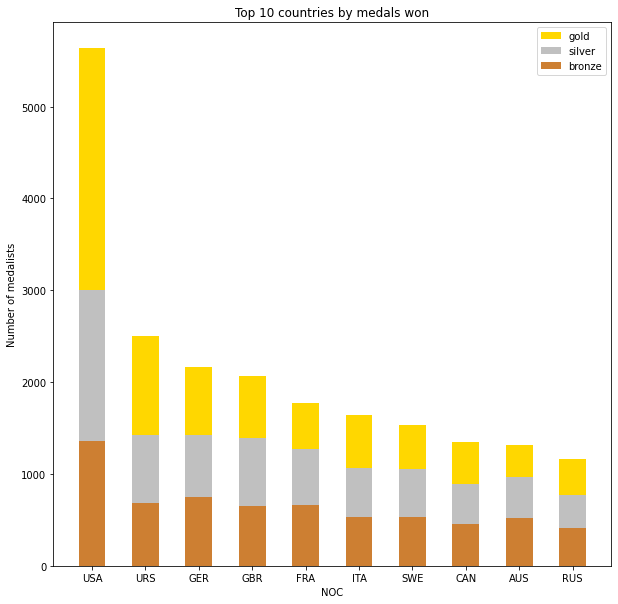

In [373]:
filter2 = df_olympics[df_olympics['Medal'] != 0]
top10Medals = filter2.groupby(['NOC'])['Medal'].count().nlargest(10)
topMedalCountries = df_olympics[df_olympics["NOC"].isin(top10Medals.index)]
gold = topMedalCountries[topMedalCountries['Medal'] == 3].groupby(['NOC'])['Medal'].count().nlargest(10)
silver = topMedalCountries[topMedalCountries['Medal'] == 2].groupby(['NOC'])['Medal'].count().nlargest(10)
bronze = topMedalCountries[topMedalCountries['Medal'] == 1].groupby(['NOC'])['Medal'].count().nlargest(10)
gold = gold.reindex(top10Medals.index)
silver = silver.reindex(top10Medals.index)
bronze = bronze.reindex(top10Medals.index)

fig_4, topCountriesStacked = plt.subplots(1,1,figsize=(10,10))
topCountriesStacked.set_xlabel("NOC")
topCountriesStacked.set_ylabel('Number of medalists')
topCountriesStacked.set_title("Top 10 countries by medals won")

topCountriesStacked.bar(np.arange(len(gold.index)),gold,width=0.5,label="gold",bottom=silver+bronze, color = 'gold') # bottom: The y coordinate(s) of the bars bases (default: 0)
topCountriesStacked.bar(np.arange(len(silver.index)),silver,width=0.5,label="silver",bottom=bronze, color = 'silver')
topCountriesStacked.bar(np.arange(len(bronze.index)),bronze,width=0.5,label="bronze", color = '#CD7F32')
plt.xticks(np.arange(len(gold.index)), [f"{i}" for i in gold.index])# to create the labels of the x axis (Class-1, Class-2, Class-3)
topCountriesStacked.legend(loc=1)

top 10 athletes in medals

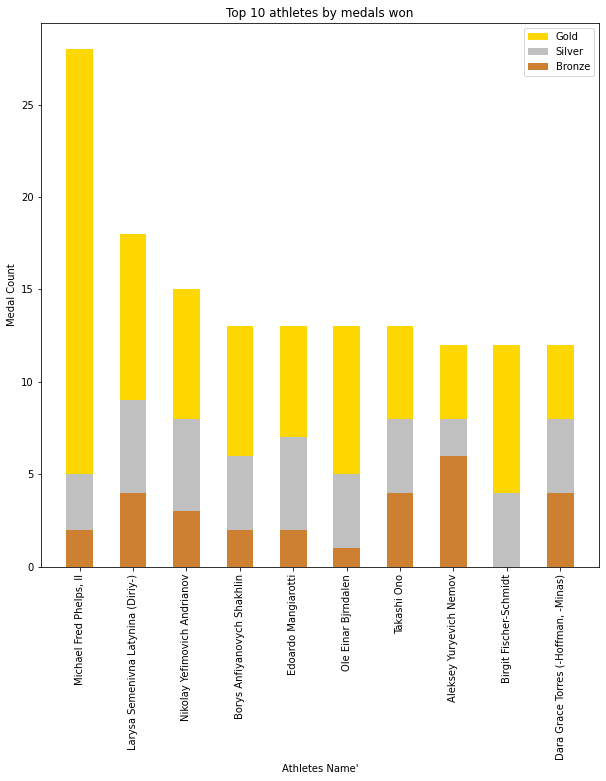

In [374]:
fil = df_olympics[df_olympics['Medal'] != 0]
top10MedalAth = fil.groupby(['Name'])['Medal'].count().nlargest(10)
topMedalPlayers = df_olympics[df_olympics["Name"].isin(top10MedalAth.index)]
goldP = topMedalPlayers[topMedalPlayers['Medal'] == 3].groupby(['Name'])['Medal'].count().nlargest(10)
silverP = topMedalPlayers[topMedalPlayers['Medal'] == 2].groupby(['Name'])['Medal'].count().nlargest(10)
bronzeP = topMedalPlayers[topMedalPlayers['Medal'] == 1].groupby(['Name'])['Medal'].count().nlargest(10)
gold = goldP.reindex(top10MedalAth.index)
silver = silverP.reindex(top10MedalAth.index)
bronze = bronzeP.reindex(top10MedalAth.index)
bronze.replace(np.nan, 0, inplace=True)
fig_4, topAthletesStacked = plt.subplots(1,1,figsize=(10,10))
topAthletesStacked.set_xlabel("Athletes Name'")
plt.xticks(rotation = 90, )
topAthletesStacked.set_ylabel('Medal Count')
topAthletesStacked.set_title("Top 10 athletes by medals won")
topAthletesStacked.bar(np.arange(len(gold.index)),gold,width=0.5,label="Gold",bottom=silver+bronze, color = 'gold') 
topAthletesStacked.bar(np.arange(len(silver.index)),silver,width=0.5,label="Silver",bottom=bronze, color = 'silver')
topAthletesStacked.bar(np.arange(len(bronze.index)),bronze,width=0.5,label="Bronze", color = '#CD7F32')
plt.xticks(np.arange(len(gold.index)), [f"{i}" for i in gold.index])
topAthletesStacked.legend(loc=1)

the top 10 sports in the average heights of its players

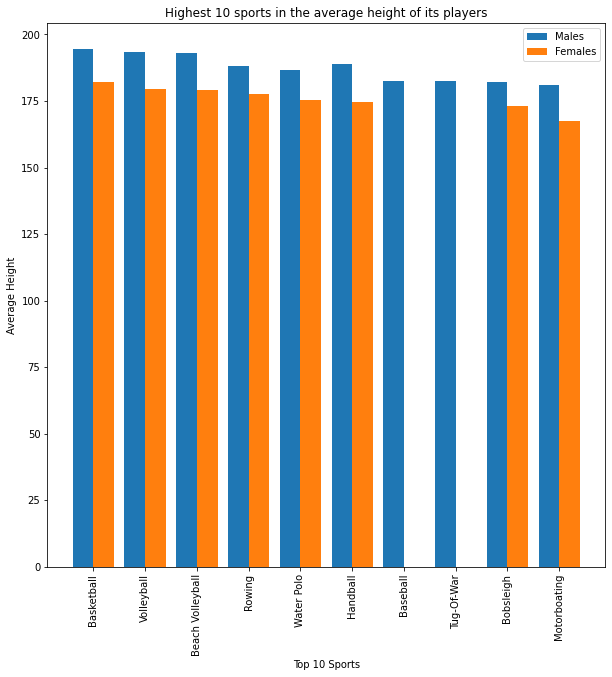

In [375]:
average_height = df_olympics.groupby(['Sport'])["Height"].mean().nlargest(10)
topAverageHeight = df_olympics[df_olympics["Sport"].isin(average_height.index)]
average_height_Male = topAverageHeight[topAverageHeight["Sex"] == "M"].groupby(['Sport'])["Height"].mean()
average_height_Female = topAverageHeight[topAverageHeight["Sex"] == "F"].groupby(['Sport'])["Height"].mean()
average_height_Male = average_height_Male.reindex(average_height.index)
average_height_Female = average_height_Female.reindex(average_height.index)

X_axis = np.arange(len(average_height_Male))
plt.figure(figsize=(10,10))
plt.ylabel('Average Height')
plt.xlabel('Top 10 Sports')
plt.title("Highest 10 sports in the average height of its players")
plt.bar(X_axis - 0.2, average_height_Male.values, 0.4, label = 'Males')
plt.bar(X_axis + 0.2, average_height_Female.values, 0.4, label = 'Females')
plt.xticks(X_axis, average_height_Male.index)
plt.xticks(rotation = 90, )
plt.legend()
plt.show()

the top 10 sports in the average weights of its players

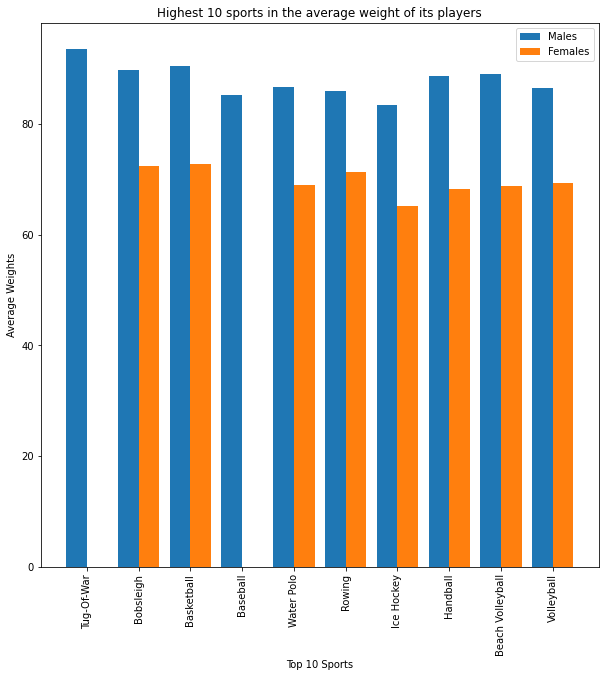

In [376]:
average_weight = df_olympics.groupby(['Sport'])["Weight"].mean().nlargest(10)
topAverageWeight = df_olympics[df_olympics["Sport"].isin(average_weight.index)]
average_weight_Male = topAverageWeight[topAverageWeight["Sex"] == "M"].groupby(['Sport'])["Weight"].mean()
average_weight_Female = topAverageWeight[topAverageWeight["Sex"] == "F"].groupby(['Sport'])["Weight"].mean()
average_weight_Male = average_weight_Male.reindex(average_weight.index)
average_weight_Female = average_weight_Female.reindex(average_weight.index)

X_axis = np.arange(len(average_weight_Male))
plt.figure(figsize=(10,10))
plt.ylabel('Average Weights')
plt.xlabel('Top 10 Sports')
plt.title("Highest 10 sports in the average weight of its players")
plt.bar(X_axis - 0.2, average_weight_Male.values, 0.4, label = 'Males')
plt.bar(X_axis + 0.2, average_weight_Female.values, 0.4, label = 'Females')
plt.xticks(X_axis, average_weight_Male.index)
plt.xticks(rotation = 90, )
plt.legend()
plt.show()

the top 10 sports in the average age of its players

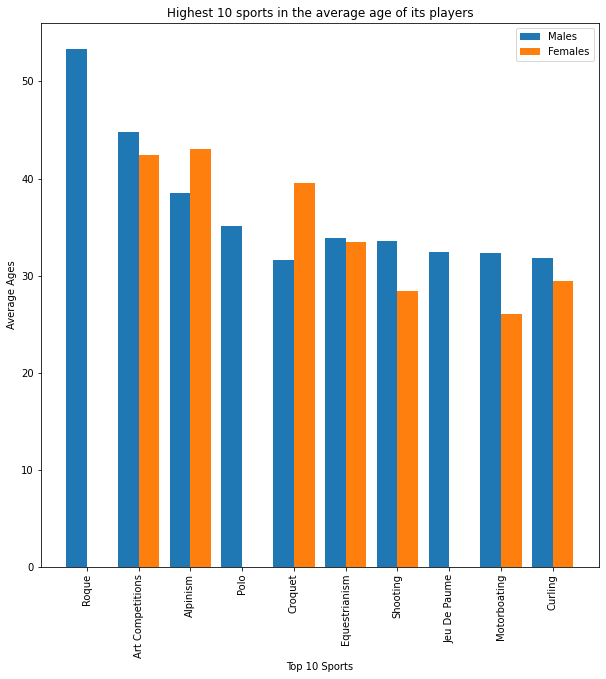

In [377]:
average_Age = df_olympics.groupby(['Sport'])["Age"].mean().nlargest(10)
topAverageAge = df_olympics[df_olympics["Sport"].isin(average_Age.index)]
average_Age_Male = topAverageAge[topAverageAge["Sex"] == "M"].groupby(['Sport'])["Age"].mean()
average_Age_Female = topAverageAge[topAverageAge["Sex"] == "F"].groupby(['Sport'])["Age"].mean()
average_Age_Male = average_Age_Male.reindex(average_Age.index)
average_Age_Female = average_Age_Female.reindex(average_Age.index)

X_axis = np.arange(len(average_Age_Male))
plt.figure(figsize=(10,10))
plt.ylabel('Average Ages')
plt.xlabel('Top 10 Sports')
plt.title("Highest 10 sports in the average age of its players")
plt.bar(X_axis - 0.2, average_Age_Male.values, 0.4, label = 'Males')
plt.bar(X_axis + 0.2, average_Age_Female.values, 0.4, label = 'Females')
plt.xticks(X_axis, average_Age_Male.index)
plt.xticks(rotation = 90, )
plt.legend()
plt.show()

top 10 countries in medals won and how their performance differ in each season

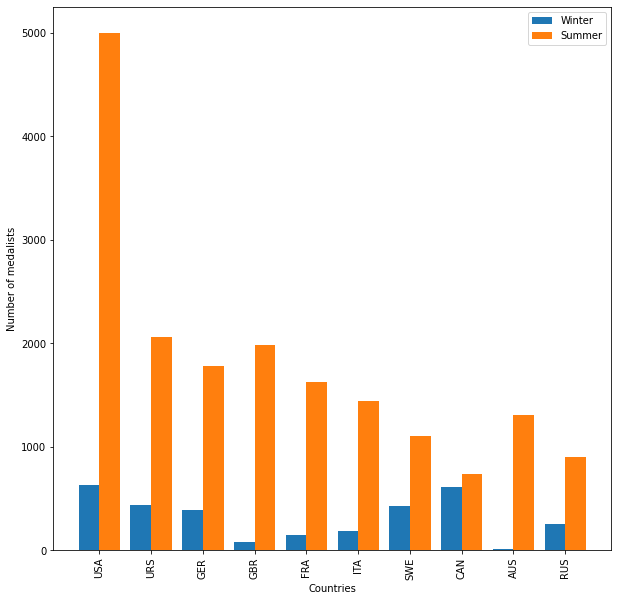

In [378]:
filter2 = df_olympics[df_olympics['Medal'] != 0]
top10Medals = filter2.groupby(['NOC'])['Medal'].count().nlargest(10)
topMedalCountries = df_olympics[df_olympics["NOC"].isin(top10Medals.index)]
winter = topMedalCountries[(topMedalCountries["Medal"] != 0) & (topMedalCountries["Season"] == "Winter")].groupby(['NOC'])['Medal'].count().nlargest(10)
summer = topMedalCountries[(topMedalCountries["Medal"] != 0) & (topMedalCountries["Season"] == "Summer")].groupby(['NOC'])['Medal'].count().nlargest(10)
winter = winter.reindex(top10Medals.index)
summer = summer.reindex(top10Medals.index)

X_axis = np.arange(len(winter))
plt.figure(figsize=(10,10))
plt.ylabel('Number of medalists')
plt.xlabel('Countries')
plt.bar(X_axis - 0.2, winter.values, 0.4, label = 'Winter')
plt.bar(X_axis + 0.2, summer.values, 0.4, label = 'Summer')
plt.xticks(X_axis, winter.index)
plt.xticks(rotation = 90, )
plt.legend()
plt.show()

distribution of medalists according to their age

(array([0.0000e+00, 3.4460e+03, 2.8994e+04, 6.3830e+03, 8.4200e+02,
        1.0800e+02, 1.0000e+01, 0.0000e+00, 0.0000e+00]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]),
 <BarContainer object of 9 artists>)

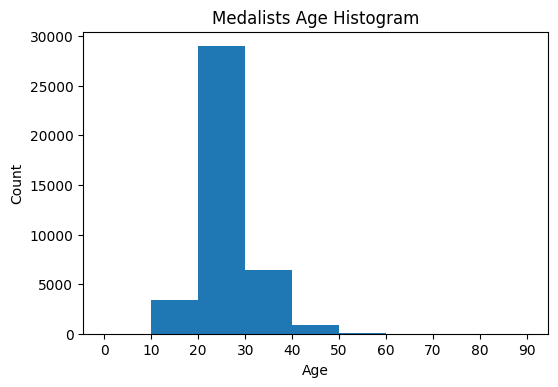

In [379]:
winning_players = df_olympics[df_olympics["Medal"] != 0]
bins = [0,10,20,30,40,50,60,70,80,90]#the intervals (bins) of the histogram
fig, medalistsAge = plt.subplots(1,1,dpi=100)
medalistsAge.set_title('Medalists Age Histogram')
medalistsAge.set_xlabel('Age')
medalistsAge.set_xticks(bins)
medalistsAge.set_ylabel('Count')
medalistsAge.hist(winning_players['Age'],width=10,bins=bins)

distribution of medalists according to their heights

(array([    0.,  1232., 22591., 15440.,   520.,     0.]),
 array([120, 140, 160, 180, 200, 220, 240]),
 <BarContainer object of 6 artists>)

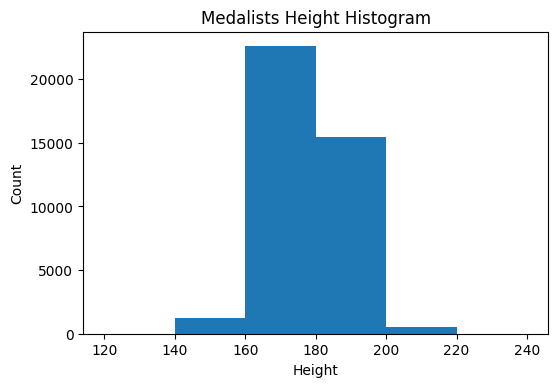

In [380]:
bins= [120,140,160,180,200,220,240]
fig, medalistsHeight = plt.subplots(1,1,dpi=100)
medalistsHeight.set_title('Medalists Height Histogram')
medalistsHeight.set_xlabel('Height')
medalistsHeight.set_xticks(bins)
medalistsHeight.set_ylabel('Count')
medalistsHeight.hist(winning_players['Height'],width=20,bins=bins)

distribution of medalists according to their weights

(array([7.0000e+01, 5.3230e+03, 2.3805e+04, 9.7340e+03, 8.4200e+02,
        9.0000e+00]),
 array([ 20,  40,  60,  80, 100, 120, 140]),
 <BarContainer object of 6 artists>)

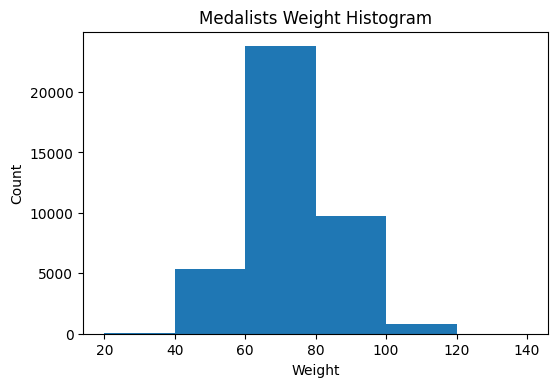

In [381]:
bins = [20,40,60,80,100,120,140]
fig, medalistsWeight = plt.subplots(1,1,dpi=100)
medalistsWeight.set_title('Medalists Weight Histogram')
medalistsWeight.set_xlabel('Weight')
medalistsWeight.set_xticks(bins)
medalistsWeight.set_ylabel('Count')
medalistsWeight.hist(winning_players['Weight'],width=20,bins=bins)

The relation between Weight and Height in Males and Females

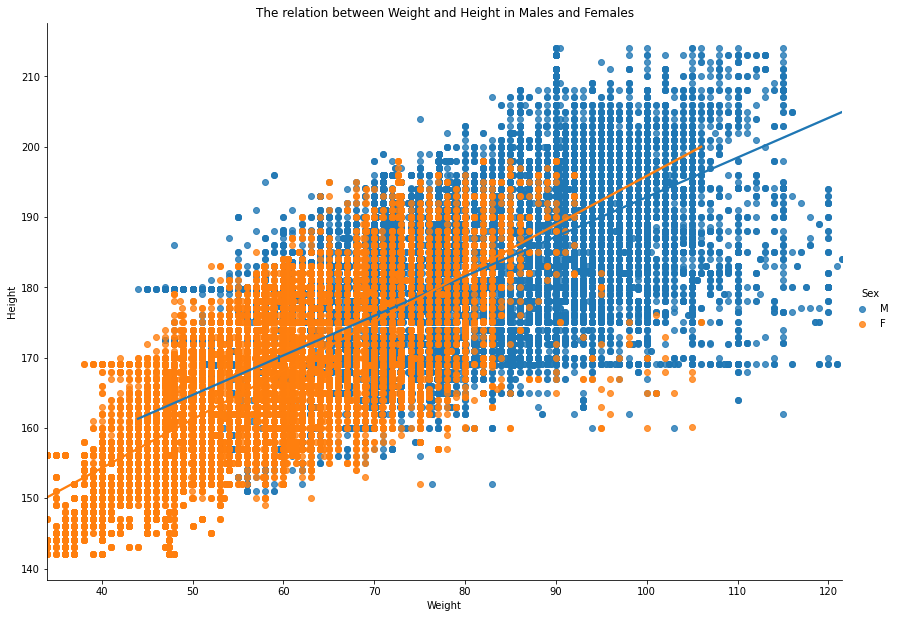

In [382]:
ax=sns.lmplot(x='Weight', y='Height', data=df_olympics,hue='Sex',height=8.27, aspect=11.7/8.27)
plt.title("The relation between Weight and Height in Males and Females")
plt.show()

Text(0.5, 1.0, 'Number of male/female participants over the years in Summer')

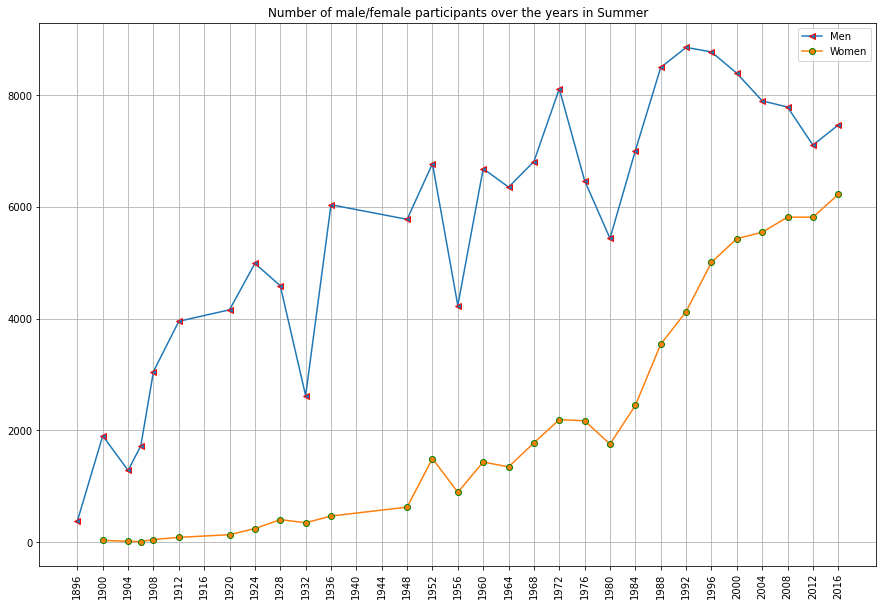

In [383]:
men = df_olympics[(df_olympics.Season == 'Summer') & (df_olympics.Sex == 'M')]
menLine = men.groupby(['Year'])['Sex'].count()

women = df_olympics[(df_olympics.Season == 'Summer') & (df_olympics.Sex == 'F')]
womenLine = women.groupby(['Year'])['Sex'].count()

plt.figure(figsize=(15, 10))

plt.plot(menLine.index, menLine.values, label="Men", marker='<', markeredgecolor='red')
plt.plot(womenLine.index, womenLine.values, label="Women", marker='o', markeredgecolor='green')
plt.xticks(np.arange(min(menLine.index), max(menLine.index)+1, 4),rotation=90)
plt.grid()

plt.legend(loc=1)

plt.title('Number of male/female participants over the years in Summer')

Text(0.5, 1.0, 'Number of male/female participants over the years in Winter')

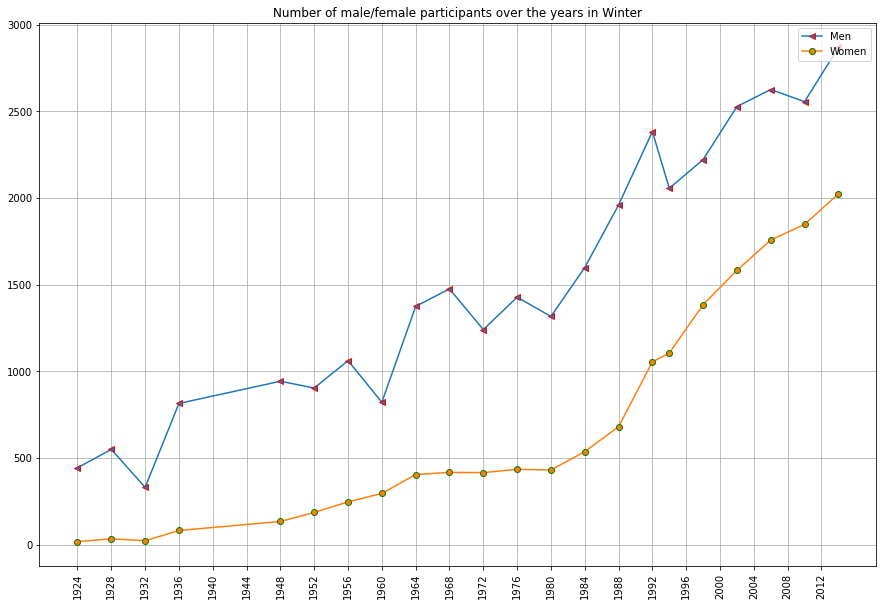

In [384]:
men = df_olympics[(df_olympics.Season == 'Winter') & (df_olympics.Sex == 'M')]
menLine = men.groupby(['Year'])['Sex'].count()

women = df_olympics[(df_olympics.Season == 'Winter') & (df_olympics.Sex == 'F')]
womenLine = women.groupby(['Year'])['Sex'].count()

plt.figure(figsize=(15, 10))

plt.plot(menLine.index, menLine.values, label="Men", marker='<', markeredgecolor='red')
plt.plot(womenLine.index, womenLine.values, label="Women", marker='o', markeredgecolor='green')
plt.xticks(np.arange(min(menLine.index), max(menLine.index)+1, 4),rotation=90)
plt.grid()

plt.legend(loc=1)

plt.title('Number of male/female participants over the years in Winter')

In the next figures, we see the variation of weights for male/female athletes over time in both seasons, we plot the figures on a scale starting from 0 and then we plot a zoomed in version of it to observe clearly the weight variation.

In [385]:
MenWinter = df_olympics[(df_olympics.Season == 'Winter')&(df_olympics.Sex == 'M')]
WomenWinter  = df_olympics[(df_olympics.Season == 'Winter')&(df_olympics.Sex == 'F')]
MenSummer = df_olympics[(df_olympics.Season == 'Summer')&(df_olympics.Sex == 'M')]
WomenSummer  = df_olympics[(df_olympics.Season == 'Summer')&(df_olympics.Sex == 'F')]


C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Variation of Weight for Male Athletes over time in Summer')

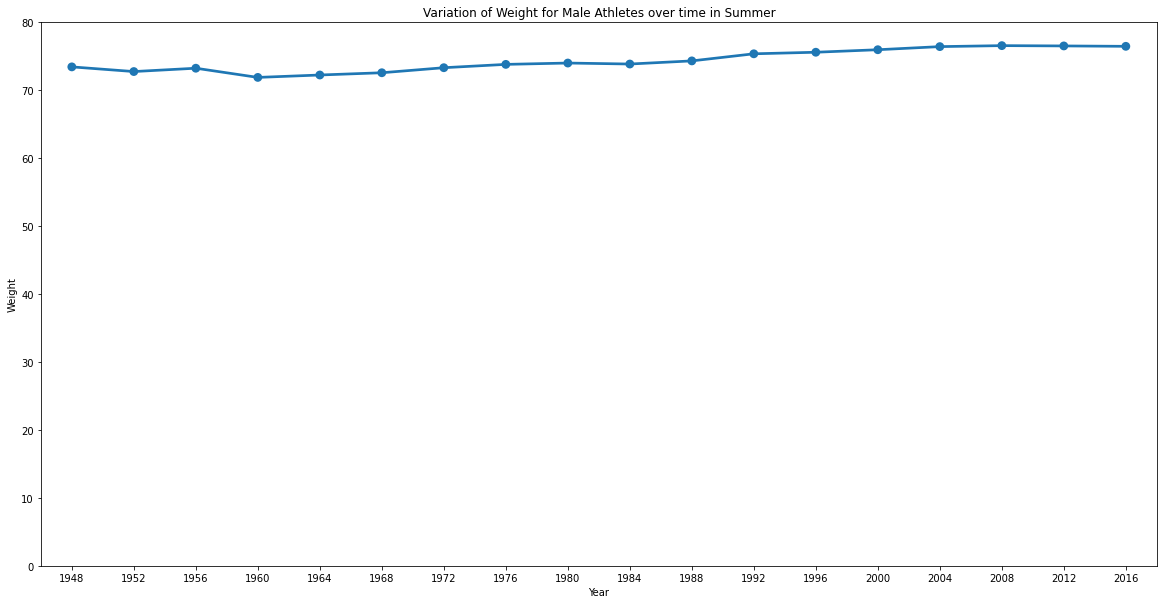

In [386]:
MenSummer = MenSummer[MenSummer["Year"] >= 1948]
plt.figure(figsize=(20, 10))
ax = plt.gca()
ax.set_ylim([0, 80])
sns.pointplot('Year', 'Weight', data=MenSummer)
plt.title('Variation of Weight for Male Athletes over time in Summer')

C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Variation of Weight for Male Athletes over time in Summer (Zoomed in)')

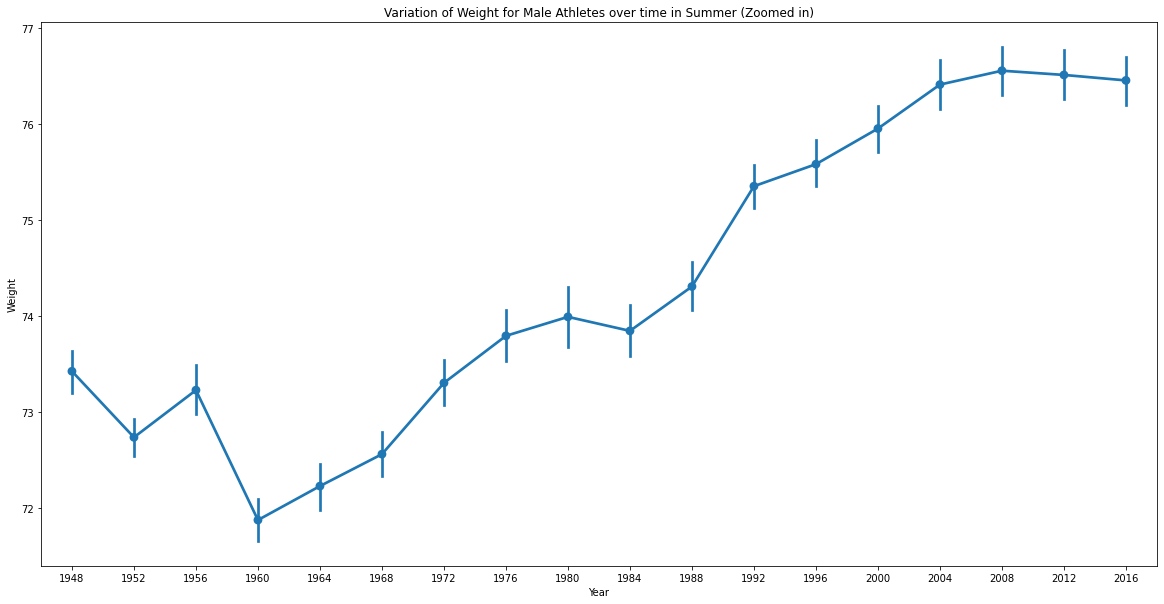

In [387]:
MenSummer = MenSummer[MenSummer["Year"] >= 1948]
plt.figure(figsize=(20, 10))
sns.pointplot('Year', 'Weight', data=MenSummer)
plt.title('Variation of Weight for Male Athletes over time in Summer (Zoomed in)')

C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Variation of Weight for Female Athletes over time in Summer')

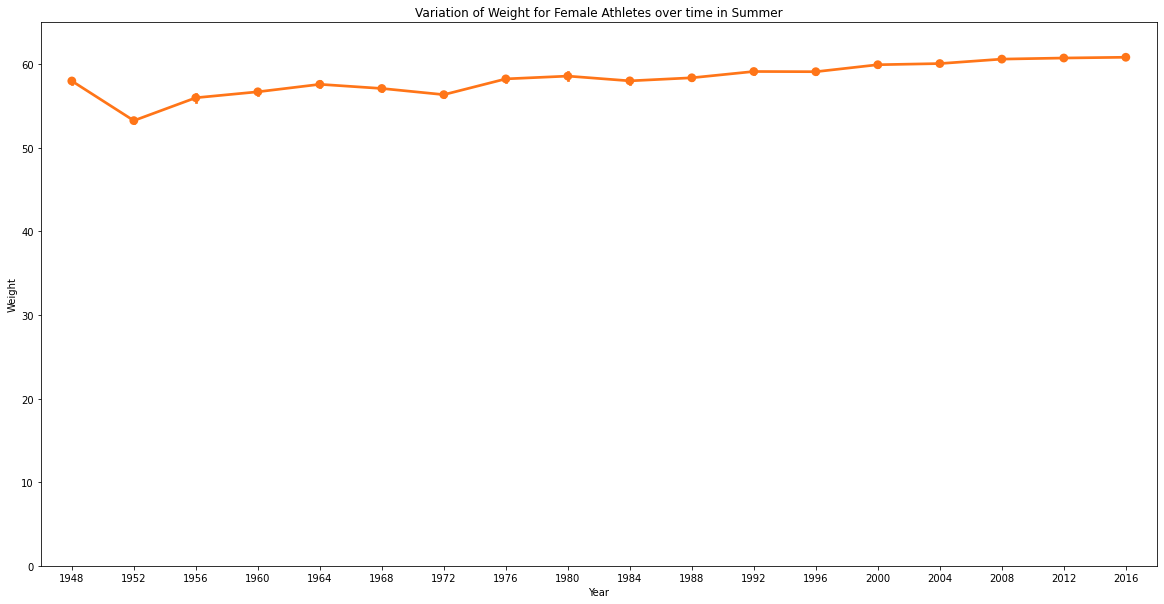

In [388]:
WomenSummer = WomenSummer[WomenSummer["Year"] >= 1948]
plt.figure(figsize=(20, 10))
ax = plt.gca()
ax.set_ylim([0, 65])
sns.pointplot('Year', 'Weight', data=WomenSummer, color="#FF7518")
plt.title('Variation of Weight for Female Athletes over time in Summer')

C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Variation of Weight for Female Athletes over time in Summer (Zoomed in)')

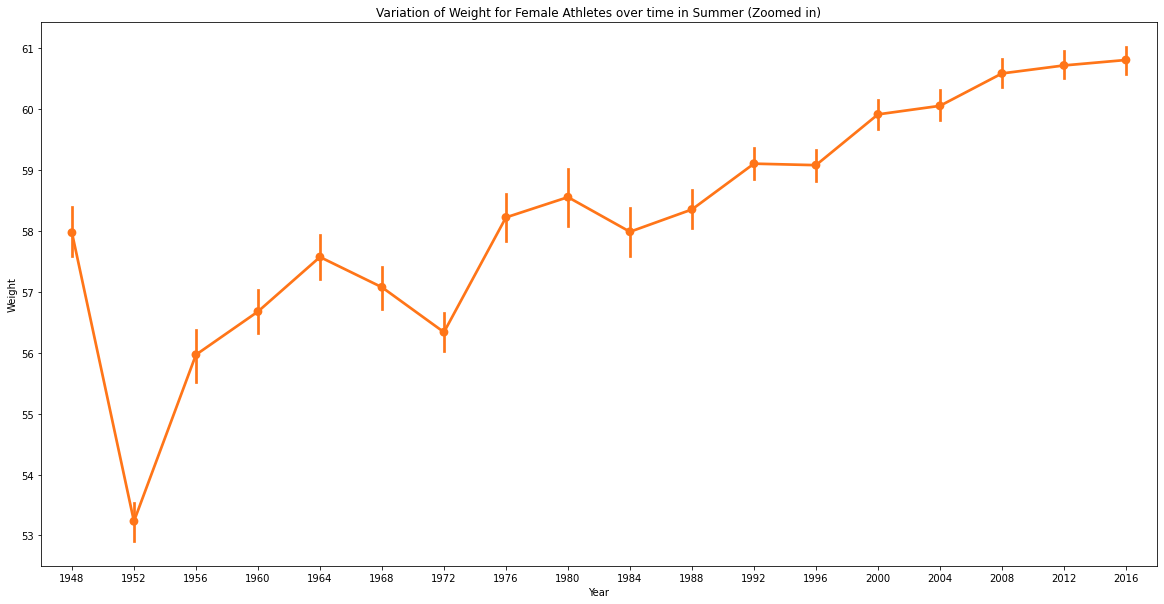

In [389]:
WomenSummer = WomenSummer[WomenSummer["Year"] >= 1948]
plt.figure(figsize=(20, 10))
sns.pointplot('Year', 'Weight', data=WomenSummer, color="#FF7518")
plt.title('Variation of Weight for Female Athletes over time in Summer (Zoomed in)')

C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Variation of Weight for Male Athletes over time in Winter')

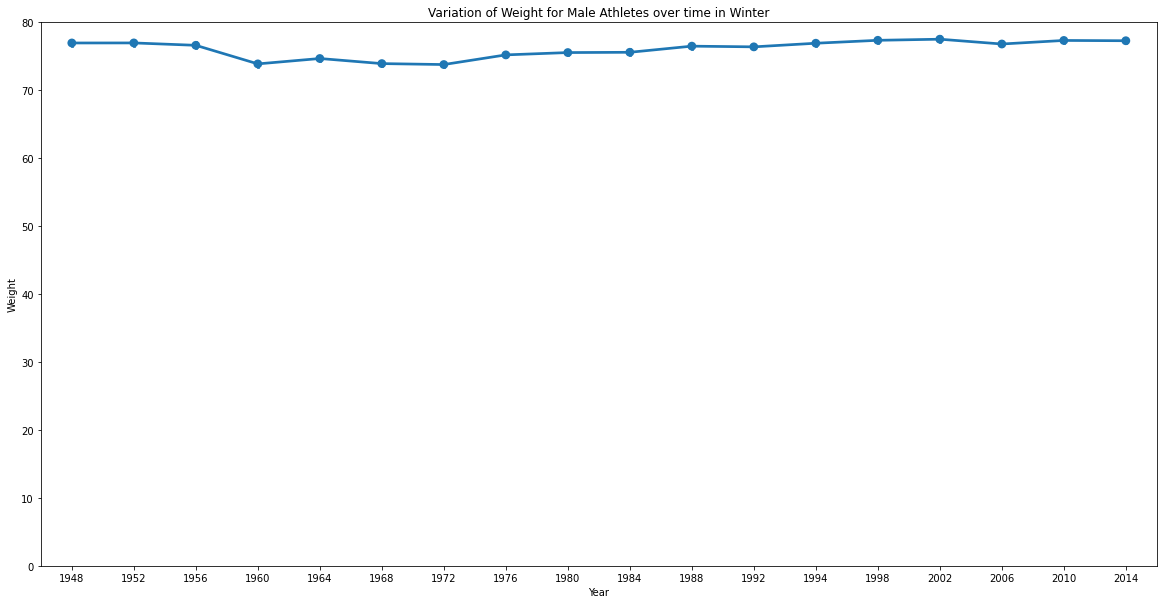

In [390]:
MenWinter = MenWinter[MenWinter["Year"] >= 1948]
plt.figure(figsize=(20, 10))
ax = plt.gca()
ax.set_ylim([0, 80])
sns.pointplot('Year', 'Weight', data=MenWinter)
plt.title('Variation of Weight for Male Athletes over time in Winter')

C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Variation of Weight for Male Athletes over time in Winter (Zoomed in)')

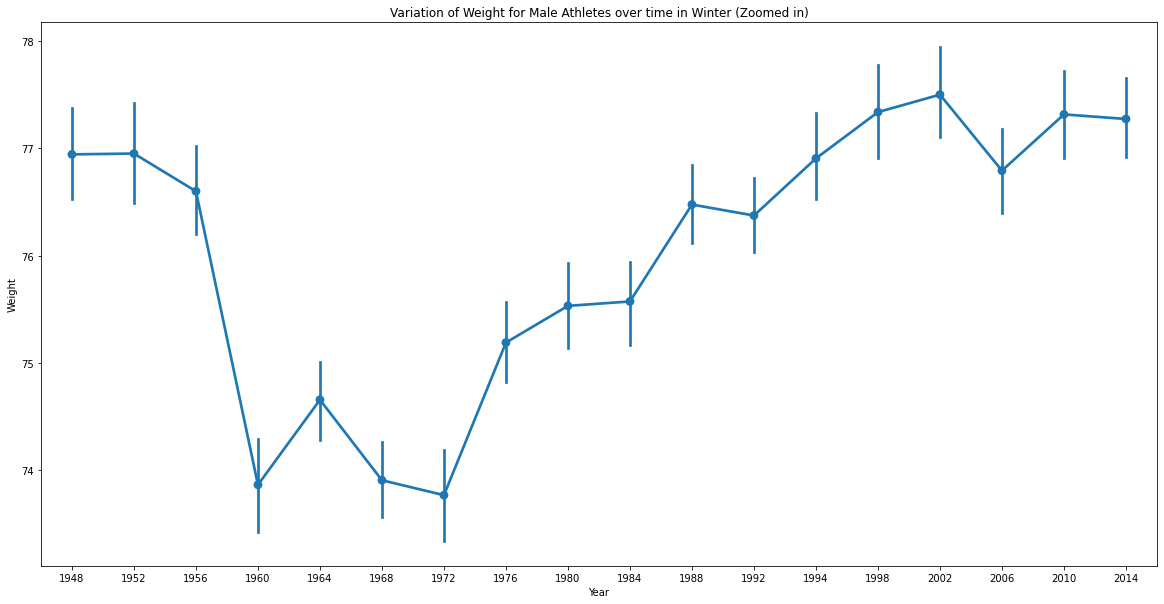

In [391]:
MenWinter = MenWinter[MenWinter["Year"] >= 1948]
plt.figure(figsize=(20, 10))
sns.pointplot('Year', 'Weight', data=MenWinter)
plt.title('Variation of Weight for Male Athletes over time in Winter (Zoomed in)')

C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Variation of Weight for Female Athletes over time in Winter')

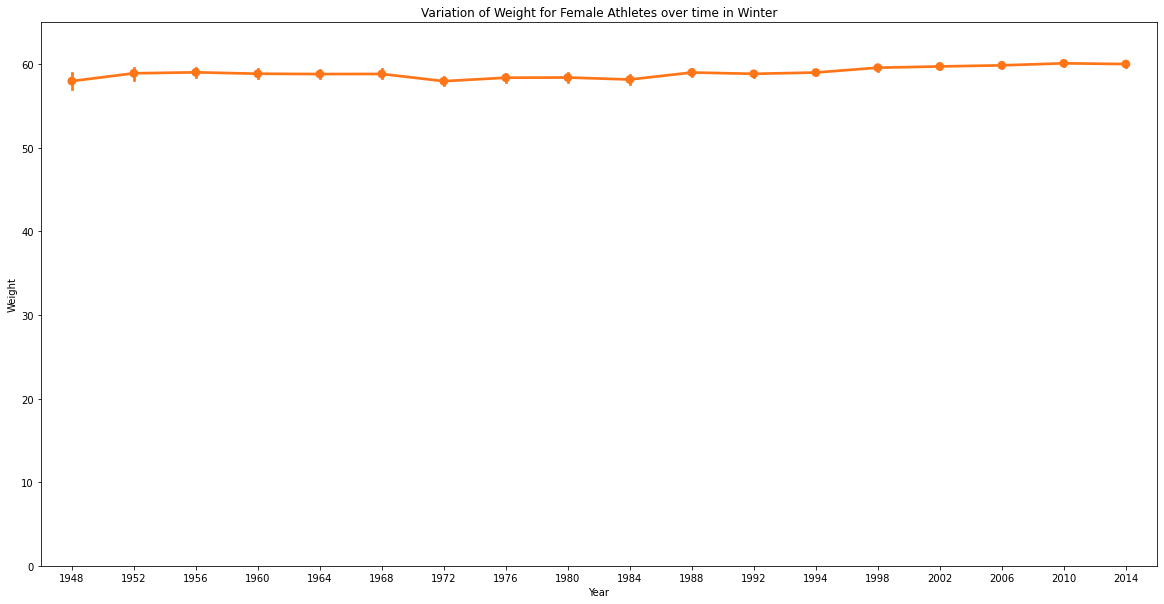

In [392]:
WomenWinter = WomenWinter[WomenWinter["Year"] >= 1948]
plt.figure(figsize=(20, 10))
ax = plt.gca()
ax.set_ylim([0, 65])
sns.pointplot('Year', 'Weight', data=WomenWinter,color="#FF7518")
plt.title('Variation of Weight for Female Athletes over time in Winter')

C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Variation of Weight for Female Athletes over time in Winter (Zoomed in)')

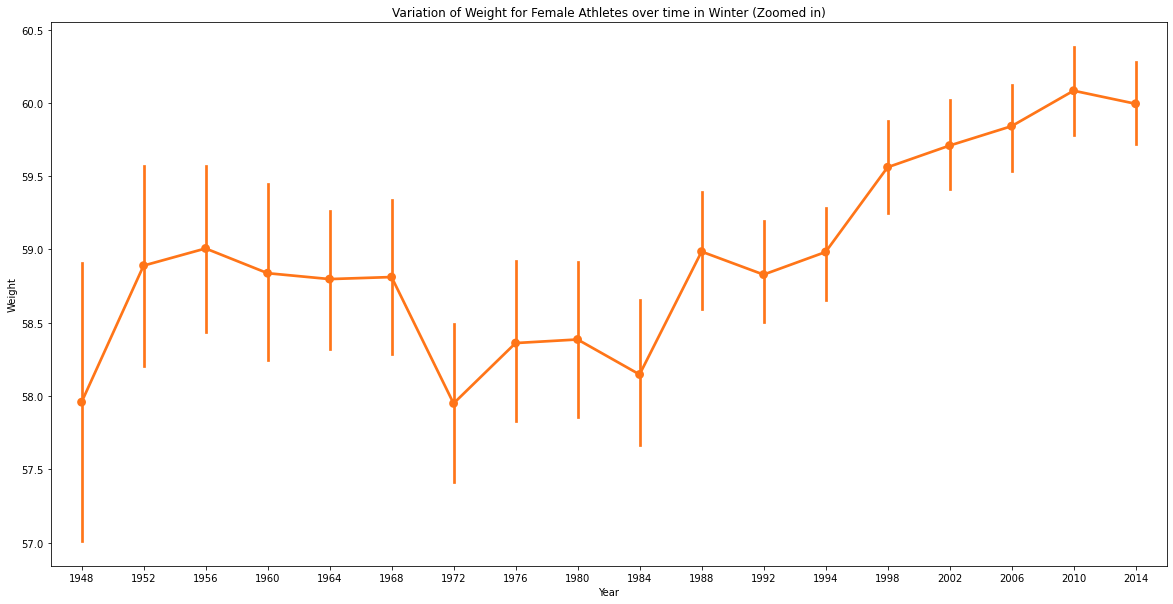

In [393]:
WomenWinter = WomenWinter[WomenWinter["Year"] >= 1948]
plt.figure(figsize=(20, 10))
sns.pointplot('Year', 'Weight', data=WomenWinter,color="#FF7518")
plt.title('Variation of Weight for Female Athletes over time in Winter (Zoomed in)')

In the next figure, we observe the variation of Age for male Athletes over time. We plot the figures on a scale starting from 0 and then we plot a zoomed in version of it to observe clearly the variations.

C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Variation of Age for Male Athletes over time')

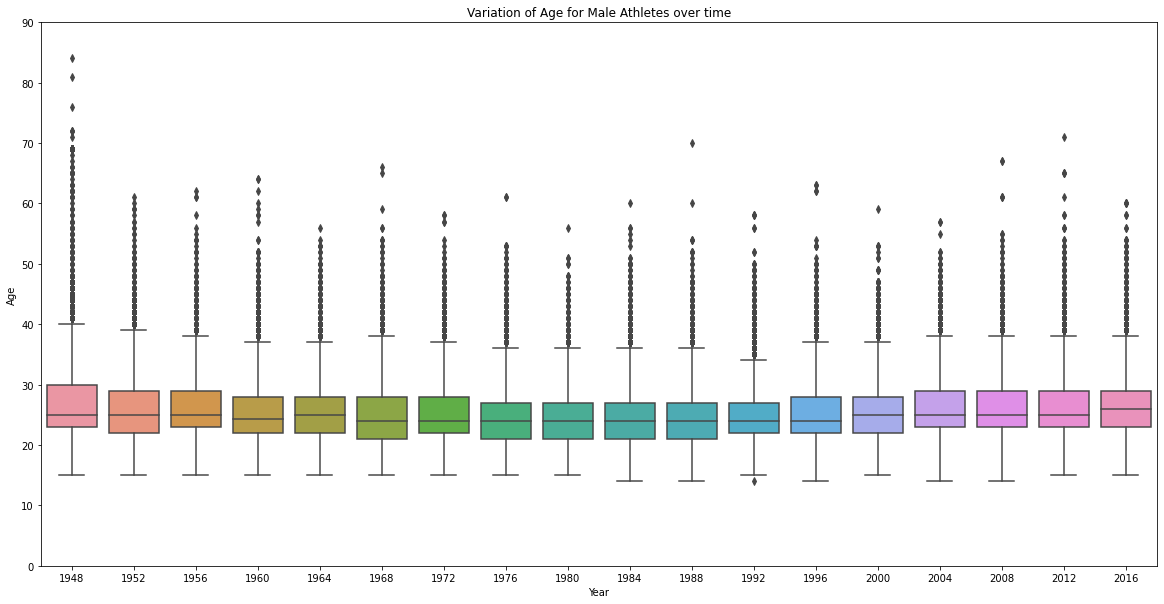

In [394]:
MenOverTime = df_olympics[(df_olympics.Sex == 'M') & (df_olympics.Season == 'Summer') & (df_olympics.Year>=1948) ]
plt.figure(figsize=(20, 10))
ax = plt.gca()
ax.set_ylim([0, 90])
sns.boxplot('Year','Age', data=MenOverTime)
plt.title('Variation of Age for Male Athletes over time')

C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Variation of Age for Male Athletes over time (Zoomed in)')

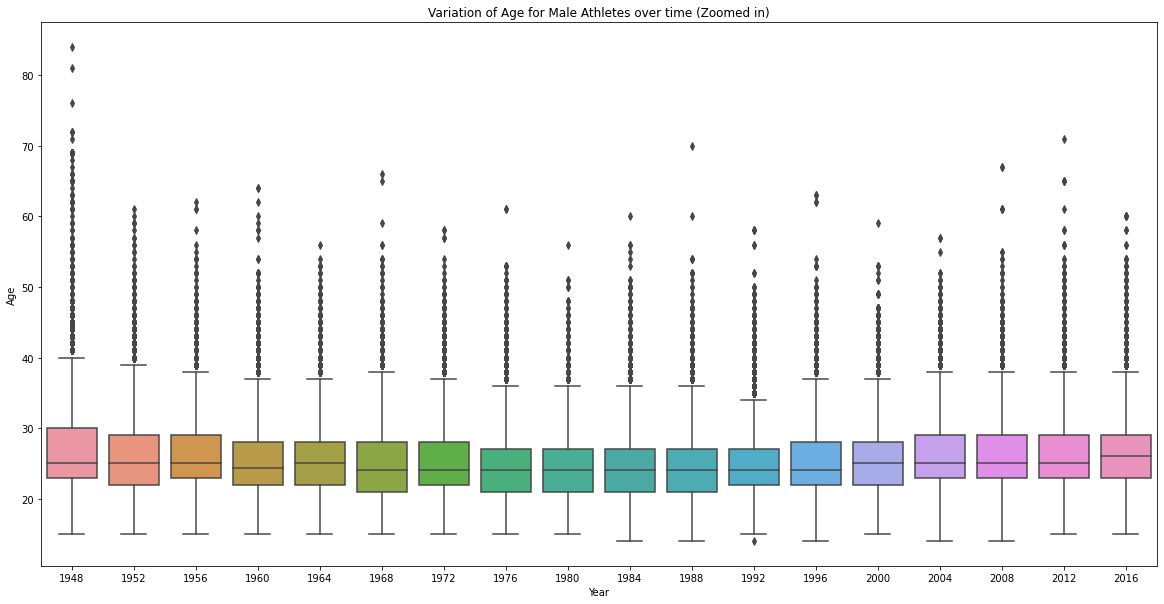

In [395]:
MenOverTime = df_olympics[(df_olympics.Sex == 'M') & (df_olympics.Season == 'Summer') & (df_olympics.Year>=1948) ]
plt.figure(figsize=(20, 10))
sns.boxplot('Year','Age', data=MenOverTime)
plt.title('Variation of Age for Male Athletes over time (Zoomed in)')

in the next figure we get the top 10 countries in the summer olympics by medals won, and then we see the height variation of the medalists in different sports.

C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'The height variation for the 10 countries with the most medals at the Summer Olympics in 21 different sport')

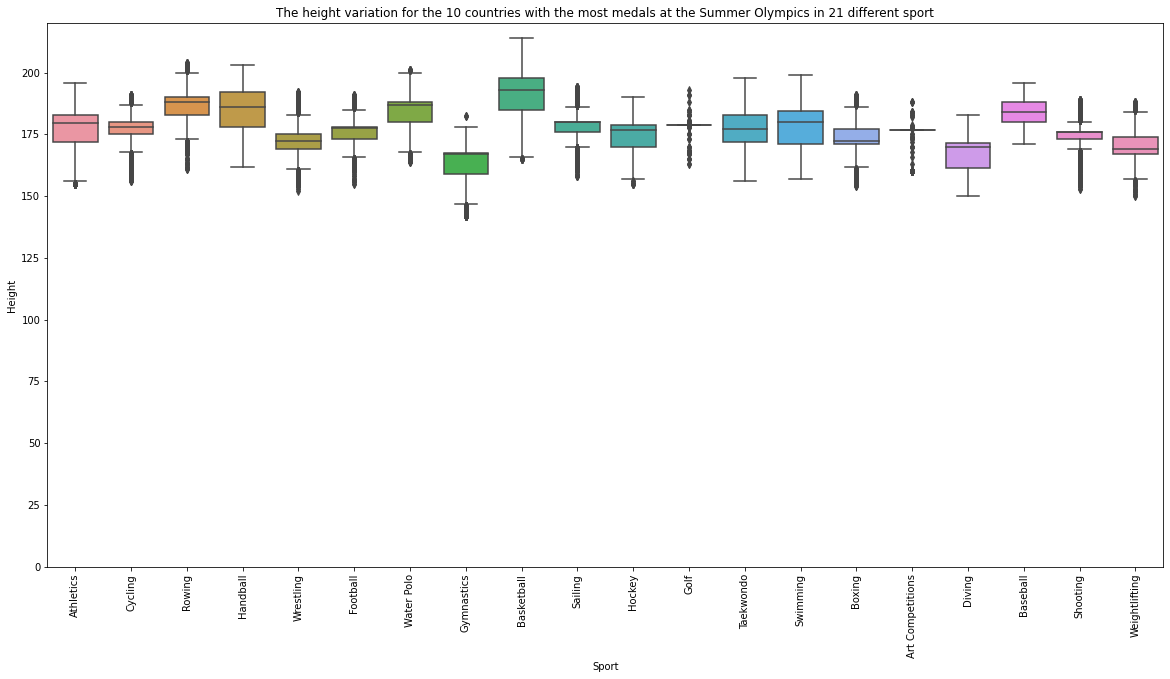

In [396]:
sports = ['Athletics', 'Cycling', 'Rowing', 'Handball', 'Wrestling','Football', 'Water Polo', 'Gymnastics',
       'Basketball', 'Sailing', 'Hockey', 'Golf',
       'Taekwondo', 'Swimming', 'Boxing', 'Art Competitions',
       'Synchronized ', 'Diving', 'Baseball', 'Shooting',
       'Weightlifting']
filter2 = df_olympics[df_olympics['Medal'] != 0]
top10Medals = filter2.groupby(['NOC'])['Medal'].count().nlargest(10)
MenOverTime = df_olympics[(df_olympics.Season == 'Summer')]
MenOverTime = MenOverTime[MenOverTime["NOC"].isin(top10Medals.index) & MenOverTime["Sport"].isin(sports)]
plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
ax = plt.gca()
ax.set_ylim([0, 220])
sns.boxplot('Sport','Height', data=MenOverTime)
plt.title('The height variation for the 10 countries with the most medals at the Summer Olympics in 21 different sport')

C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'The height variation for the 10 countries with the most medals at the Summer Olympics in 21 different sport (Zoomed in)')

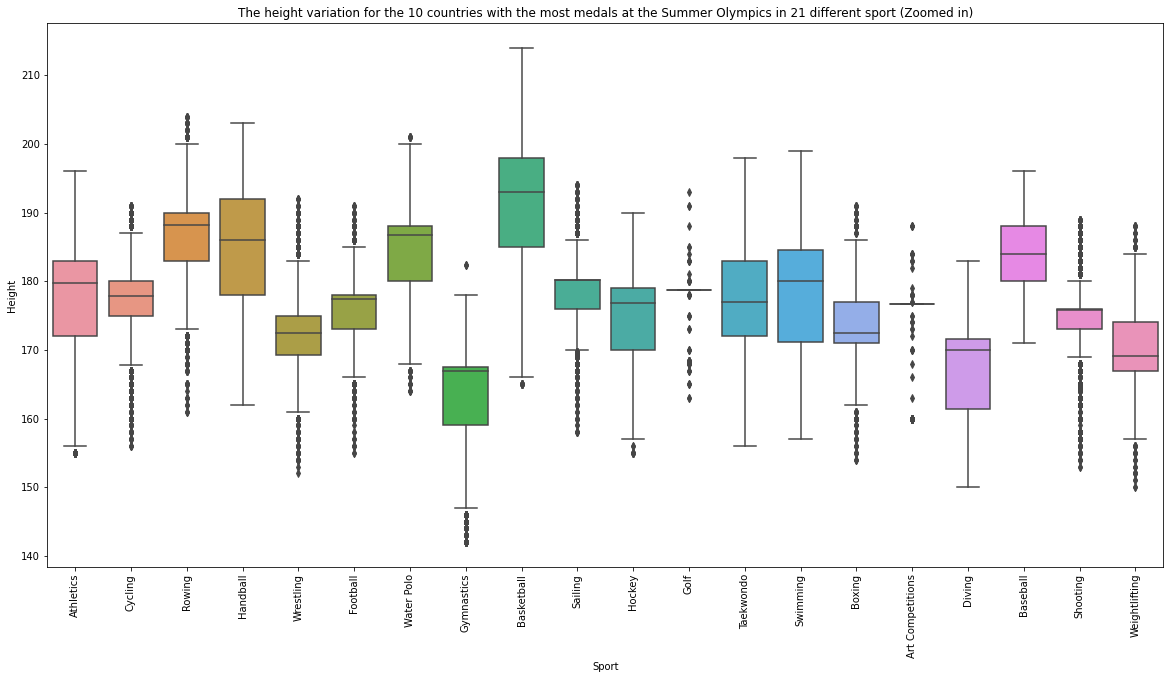

In [397]:
sports = ['Athletics', 'Cycling', 'Rowing', 'Handball', 'Wrestling','Football', 'Water Polo', 'Gymnastics',
       'Basketball', 'Sailing', 'Hockey', 'Golf',
       'Taekwondo', 'Swimming', 'Boxing', 'Art Competitions',
       'Synchronized ', 'Diving', 'Baseball', 'Shooting',
       'Weightlifting']
filter2 = df_olympics[df_olympics['Medal'] != 0]
top10Medals = filter2.groupby(['NOC'])['Medal'].count().nlargest(10)
MenOverTime = df_olympics[(df_olympics.Season == 'Summer')]
MenOverTime = MenOverTime[MenOverTime["NOC"].isin(top10Medals.index) & MenOverTime["Sport"].isin(sports)]
plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
sns.boxplot('Sport','Height', data=MenOverTime)
plt.title('The height variation for the 10 countries with the most medals at the Summer Olympics in 21 different sport (Zoomed in)')

In the next figure, we see the variation of heights within each of the top 20 countries.

C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Variation of the Heights of Males Per Country of The Top 20 Countries With Medals')

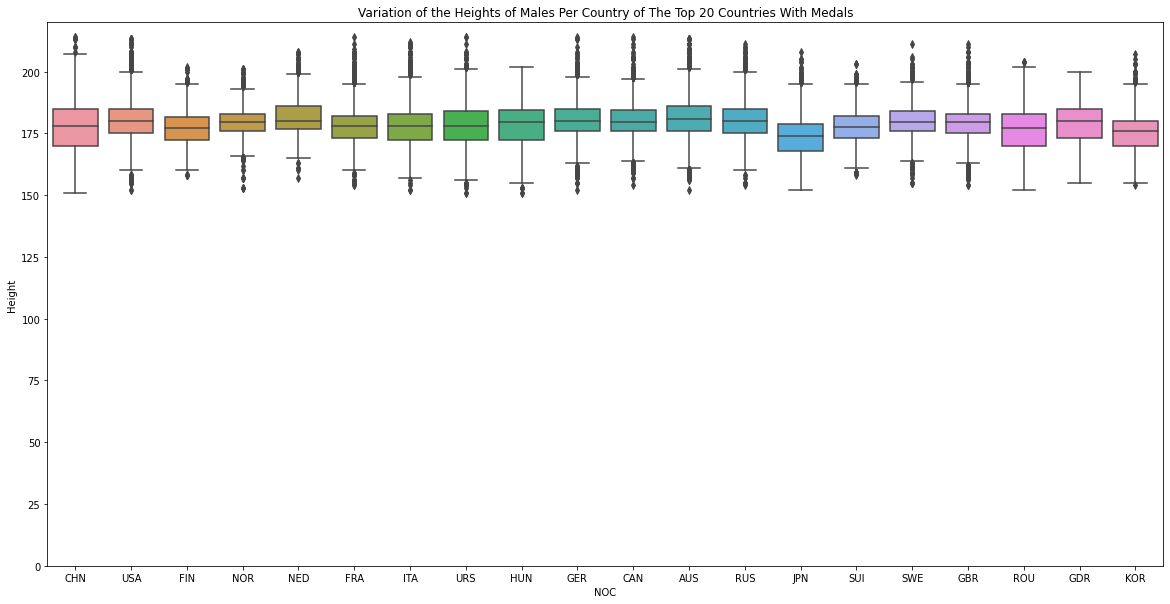

In [398]:
top20Medals = filter2.groupby(['NOC'], as_index=False)['Medal'].count()
top20Medals= top20Medals.sort_values(["Medal"], ascending=False).head(20)
MenHeightPerCountry = df_olympics[(df_olympics.Sex == 'M') & (df_olympics.NOC.isin(top20Medals["NOC"]))]
plt.figure(figsize=(20, 10))
ax = plt.gca()
ax.set_ylim([0, 220])
sns.boxplot('NOC','Height', data=MenHeightPerCountry)
plt.title('Variation of the Heights of Males Per Country of The Top 20 Countries With Medals')

C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Variation of the Heights of Males Per Country of The Top 20 Countries With Medals(Zoomed in)')

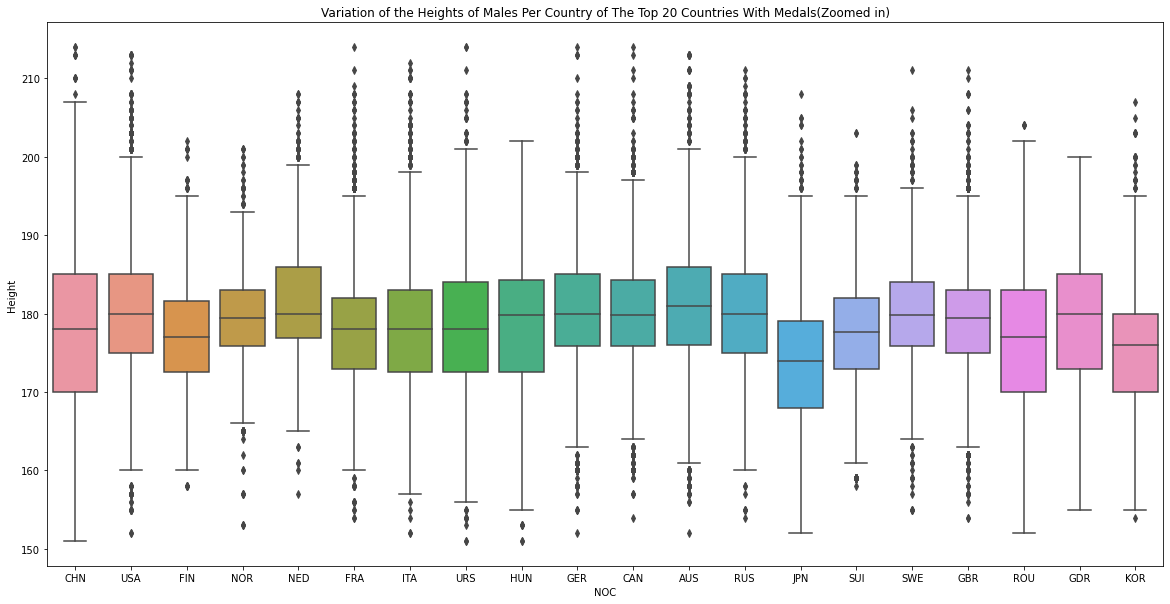

In [399]:
top20Medals = filter2.groupby(['NOC'], as_index=False)['Medal'].count()
top20Medals= top20Medals.sort_values(["Medal"], ascending=False).head(20)
MenHeightPerCountry = df_olympics[(df_olympics.Sex == 'M') & (df_olympics.NOC.isin(top20Medals["NOC"]))]
plt.figure(figsize=(20, 10))
sns.boxplot('NOC','Height', data=MenHeightPerCountry)
plt.title('Variation of the Heights of Males Per Country of The Top 20 Countries With Medals(Zoomed in)')

C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Variation of the Heights of Females Per Country of The Top 20 Countries With Medals')

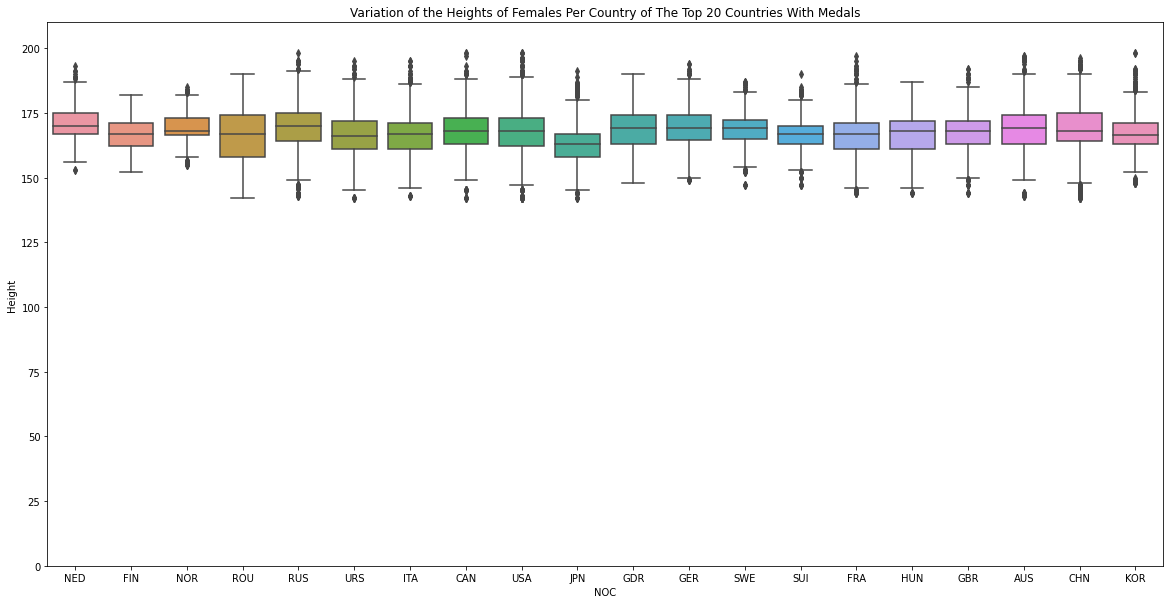

In [400]:
top20Medals = filter2.groupby(['NOC'], as_index=False)['Medal'].count()
top20Medals= top20Medals.sort_values(["Medal"], ascending=False).head(20)
WomenHeightPerCountry = df_olympics[(df_olympics.Sex == 'F') & (df_olympics.NOC.isin(top20Medals["NOC"]))]
plt.figure(figsize=(20, 10))
ax = plt.gca()
ax.set_ylim([0, 210])
sns.boxplot('NOC','Height', data=WomenHeightPerCountry)
plt.title('Variation of the Heights of Females Per Country of The Top 20 Countries With Medals')

C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Variation of the Heights of Females Per Country of The Top 20 Countries With Medals (Zoomed in)')

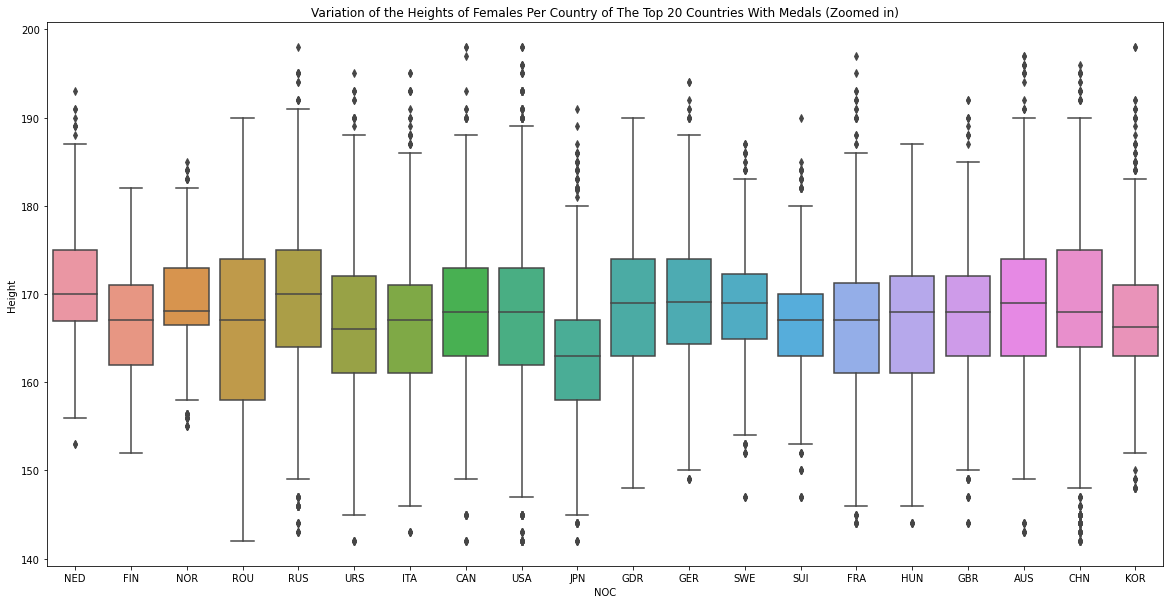

In [401]:
top20Medals = filter2.groupby(['NOC'], as_index=False)['Medal'].count()
top20Medals= top20Medals.sort_values(["Medal"], ascending=False).head(20)
WomenHeightPerCountry = df_olympics[(df_olympics.Sex == 'F') & (df_olympics.NOC.isin(top20Medals["NOC"]))]
plt.figure(figsize=(20, 10))
sns.boxplot('NOC','Height', data=WomenHeightPerCountry)
plt.title('Variation of the Heights of Females Per Country of The Top 20 Countries With Medals (Zoomed in)')

# Milestone2

## Data Integration

merging Hosting_Country (which maps each city to its corresponding country) Dataset

In [402]:
df_hosting_country = pd.read_csv("Hosting_Country.csv")
df_hosting_country.head(10)

,City,Hosting Country
0,Barcelona,Spain
1,London,UK
2,Antwerpen,Belgium
3,Paris,France
4,Calgary,Canada
5,Albertville,France
6,Lillehammer,Norway
7,Los Angeles,USA
8,Salt Lake City,USA
9,Helsinki,Finland


In [403]:
df_olympics_v2 = pd.merge(df_olympics, df_hosting_country,how='left')
df_olympics_v2.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Hosting Country
0,1,A Dijiang,M,24.0,180.000000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0,Spain
1,2,A Lamusi,M,23.0,170.000000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0,UK
2,3,Gunnar Nielsen Aaby,M,24.0,177.402044,72.833189,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0,Belgium
3,4,Edgar Lindenau Aabye,M,34.0,182.375000,93.629355,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,3,France
4,5,Christine Jacoba Aaftink,F,21.0,166.947818,61.401176,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0,Canada


merging noc_Regions dataset

In [404]:
noc_Regions = pd.read_csv("noc_Regions.csv")
noc_Regions.head(10)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
5,ANG,Angola,NaN
6,ANT,Antigua,Antigua and Barbuda
7,ANZ,Australia,Australasia
8,ARG,Argentina,NaN
9,ARM,Armenia,NaN


In [405]:
df_olympics_v3 = pd.merge(df_olympics_v2, noc_Regions,on='NOC',how='left')
df_olympics_v3.loc[df_olympics_v3.NOC == "SGP", 'region'] = "Singapore"
df_olympics_v4 = df_olympics_v3.drop('notes', 1)
df_olympics_v4["region"].fillna("Other",inplace=True)
df_olympics_v3.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Hosting Country,region,notes
0,1,A Dijiang,M,24.0,180.000000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0,Spain,China,NaN
1,2,A Lamusi,M,23.0,170.000000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0,UK,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,177.402044,72.833189,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0,Belgium,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,182.375000,93.629355,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,3,France,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,166.947818,61.401176,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0,Canada,Netherlands,NaN


In [406]:
df_olympics_v4 = df_olympics_v3.drop('notes', 1)

merging continents Dataset (which maps each country(Region) to its continent)

In [407]:
df_continents = pd.read_csv("continents.csv")
df_continents.head(10)

,NOC,region,Continent
0,AFG,Afghanistan,Asia
1,ALG,Algeria,Africa
2,ASA,American Samoa,Oceania
3,ANG,Angola,Africa
4,ALB,Albania,Europe
5,BEN,Benin,Africa
6,BOT,Botswana,Africa
7,AND,Andorra,Europe
8,BDI,Burundi,Africa
9,ANT,Antigua,North America


In [408]:
df_olympics_v5= pd.merge(df_olympics_v4, df_continents,on=['NOC','region'],how='left')
df_olympics_v5.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Hosting Country,region,Continent
0,1,A Dijiang,M,24.0,180.000000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0,Spain,China,Asia
1,2,A Lamusi,M,23.0,170.000000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0,UK,China,Asia
2,3,Gunnar Nielsen Aaby,M,24.0,177.402044,72.833189,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0,Belgium,Denmark,Europe
3,4,Edgar Lindenau Aabye,M,34.0,182.375000,93.629355,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,3,France,Denmark,Europe
4,5,Christine Jacoba Aaftink,F,21.0,166.947818,61.401176,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0,Canada,Netherlands,Europe
5,5,Christine Jacoba Aaftink,F,21.0,166.947818,61.401176,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",0,Canada,Netherlands,Europe
6,5,Christine Jacoba Aaftink,F,25.0,166.947818,61.401176,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,0,France,Netherlands,Europe
7,5,Christine Jacoba Aaftink,F,25.0,166.947818,61.401176,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",0,France,Netherlands,Europe
8,5,Christine Jacoba Aaftink,F,27.0,166.947818,61.401176,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,0,Norway,Netherlands,Europe
9,5,Christine Jacoba Aaftink,F,27.0,166.947818,61.401176,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",0,Norway,Netherlands,Europe


merging Hosting Continents dataset (which maps each hosting city to its continent)

In [409]:
df_continents=pd.read_csv('Hosting_Continent.csv')
df_continents.head(10)

,City,Hosting Continent
0,Barcelona,Europe
1,London,Europe
2,Antwerpen,Europe
3,Paris,Europe
4,Calgary,North America
5,Albertville,Europe
6,Lillehammer,Europe
7,Los Angeles,North America
8,Salt Lake City,North America
9,Helsinki,Europe


In [410]:
df_olympics_new = pd.merge(df_olympics_v5, df_continents,on='City',how='left')
df_olympics_new.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Hosting Country,region,Continent,Hosting Continent
0,1,A Dijiang,M,24.0,180.000000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0,Spain,China,Asia,Europe
1,2,A Lamusi,M,23.0,170.000000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0,UK,China,Asia,Europe
2,3,Gunnar Nielsen Aaby,M,24.0,177.402044,72.833189,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0,Belgium,Denmark,Europe,Europe
3,4,Edgar Lindenau Aabye,M,34.0,182.375000,93.629355,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,3,France,Denmark,Europe,Europe
4,5,Christine Jacoba Aaftink,F,21.0,166.947818,61.401176,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0,Canada,Netherlands,Europe,North America
5,5,Christine Jacoba Aaftink,F,21.0,166.947818,61.401176,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",0,Canada,Netherlands,Europe,North America
6,5,Christine Jacoba Aaftink,F,25.0,166.947818,61.401176,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,0,France,Netherlands,Europe,Europe
7,5,Christine Jacoba Aaftink,F,25.0,166.947818,61.401176,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",0,France,Netherlands,Europe,Europe
8,5,Christine Jacoba Aaftink,F,27.0,166.947818,61.401176,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,0,Norway,Netherlands,Europe,Europe
9,5,Christine Jacoba Aaftink,F,27.0,166.947818,61.401176,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",0,Norway,Netherlands,Europe,Europe


In [411]:
df_olympics_new.shape
df_olympics_new.rename(columns={'region':'Region'},inplace=True)

In [412]:
df_olympics_new[df_olympics_new['Region']!=np.nan].shape

(271116, 19)

## Feature Engineering

We calculate for each athelete his\her bmi (Body mass index) using the following formula.

BMI = 	weight/(height^2)

In [413]:
df_olympics_new['BMI'] = (df_olympics_new['Weight'])/((df_olympics_new['Height']/100)**2)

then we discretize the bmi into 3 different groups:
 1. BMI Group=2 : for athletes whose bmi is between 18 and 25 (best bmi)
 2. BMI Group=1 : for athletes whose bmi is either between 16 and 18, or between 25 and 30
 3. BMI Group=0 : for athletes whose bmi is either less than 16, or greater than 30 (worst bmi)

The higher the group number the better.

In [414]:
BMI_Group = [] # define array structure
for bmi in df_olympics_new["BMI"]:
    if bmi < 16:
        BMI_Group.append(0)
    elif 16 <= bmi < 18:
        BMI_Group.append(1)
    elif 18 <= bmi < 25:
        BMI_Group.append(2)
    elif 25 <= bmi < 30:
        BMI_Group.append(1)
    elif 30 <= bmi:
        BMI_Group.append(0)
    else:
        BMI_Group.append(0)
        
df_olympics_new["BMI Group"] = BMI_Group

Participation Number (when it is the first time this athlete participated in the olympics, this value is equal to one, and the second time this athlete participated in the olympics, this value is equal to two, etc)

In [415]:
temp=df_olympics_new.drop_duplicates(subset=['ID','Year']).sort_values(by=['Year'])
x=temp.groupby(['ID'])
occ=temp.groupby(['ID']).cumcount()
temp['Participation Number']=occ+1
id_year_occ=temp[['ID','Year','Participation Number']]
df_olympics_final=pd.merge(df_olympics_new,id_year_occ,how='left')
df_olympics_final=df_olympics_final.sort_values('ID')
df_olympics_final.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,Sport,Event,Medal,Hosting Country,Region,Continent,Hosting Continent,BMI,BMI Group,Participation Number
0,1,A Dijiang,M,24.0,180.000000,80.000000,China,CHN,1992 Summer,1992,...,Basketball,Basketball Men's Basketball,0,Spain,China,Asia,Europe,24.691358,2,1
1,2,A Lamusi,M,23.0,170.000000,60.000000,China,CHN,2012 Summer,2012,...,Judo,Judo Men's Extra-Lightweight,0,UK,China,Asia,Europe,20.761246,2,1
2,3,Gunnar Nielsen Aaby,M,24.0,177.402044,72.833189,Denmark,DEN,1920 Summer,1920,...,Football,Football Men's Football,0,Belgium,Denmark,Europe,Europe,23.142597,2,1
3,4,Edgar Lindenau Aabye,M,34.0,182.375000,93.629355,Denmark/Sweden,DEN,1900 Summer,1900,...,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,3,France,Denmark,Europe,Europe,28.150196,1,1
4,5,Christine Jacoba Aaftink,F,21.0,166.947818,61.401176,Netherlands,NED,1988 Winter,1988,...,Speed Skating,Speed Skating Women's 500 metres,0,Canada,Netherlands,Europe,North America,22.030036,2,1
5,5,Christine Jacoba Aaftink,F,21.0,166.947818,61.401176,Netherlands,NED,1988 Winter,1988,...,Speed Skating,"Speed Skating Women's 1,000 metres",0,Canada,Netherlands,Europe,North America,22.030036,2,1
6,5,Christine Jacoba Aaftink,F,25.0,166.947818,61.401176,Netherlands,NED,1992 Winter,1992,...,Speed Skating,Speed Skating Women's 500 metres,0,France,Netherlands,Europe,Europe,22.030036,2,2
7,5,Christine Jacoba Aaftink,F,25.0,166.947818,61.401176,Netherlands,NED,1992 Winter,1992,...,Speed Skating,"Speed Skating Women's 1,000 metres",0,France,Netherlands,Europe,Europe,22.030036,2,2
8,5,Christine Jacoba Aaftink,F,27.0,166.947818,61.401176,Netherlands,NED,1994 Winter,1994,...,Speed Skating,Speed Skating Women's 500 metres,0,Norway,Netherlands,Europe,Europe,22.030036,2,3
9,5,Christine Jacoba Aaftink,F,27.0,166.947818,61.401176,Netherlands,NED,1994 Winter,1994,...,Speed Skating,"Speed Skating Women's 1,000 metres",0,Norway,Netherlands,Europe,Europe,22.030036,2,3


## Research Questions

### Research question 1: What is the effect of the number of participations across different seasons for each individual in winning medals?(for example if some players played in 5 olympics, in which olympics they reached their peak performance on average)

In this question, we see whether the higher participation number, which can be translated into having more experience, have an effect on winning medals or performing better. As we can see, the athlete's peak performance is achieved during his third participation; where we can assume that s/he accumulated enough experience while still being relatively young, because it is apparent that afterwards her/his performance decline.

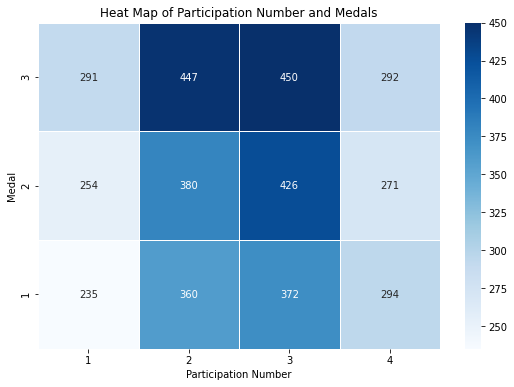

In [416]:
df_four_participation = df_olympics_final[df_olympics_final["Participation Number"] == 4]
IDs = df_four_participation.ID
exclude_not_four_participation = df_olympics_final[df_olympics_final.ID.isin(IDs.values)]
exclude_not_four_participation = exclude_not_four_participation[(exclude_not_four_participation["Participation Number"] < 5) & (exclude_not_four_participation["Medal"] != 0)]

x = [1,2,3,1,2,3,1,2,3,1,2,3]

xx = exclude_not_four_participation.groupby(['Participation Number','Medal'],as_index=False)['Medal'].count()
xx["Type"] = x

medals = xx.pivot("Type", "Participation Number", "Medal")
f, ax = plt.subplots(figsize=(9, 6))
plt.title("Heat Map of Participation Number and Medals")
sns.heatmap(medals, annot=True,  linewidths=.5, ax=ax,cmap='Blues', fmt='g')
ax.invert_yaxis()
ax.set_ylabel("Medal")
plt.show()

### Research question 2: The effect of weight and height (BMI) on winning medals?

In this part we analyze whether bmi has an effect on winning medals or not, but we had to take into account that the number of players that belong to BMI Group=2 are the majority, so we had to calculate the ratio of medalists that belong to each BMI Group divided by the total number of people that belong to this BMI Group; this helps us see the percentage of people that win this medal (3, 2 or 1) as a percentage of the whole athletes that belong to the same BMI Group, and if it was higher that would have indicated that this BMI Group actually performs better. However, as we can see from the following figures, the ratio is lower in the BMI Group=2 which indicates that the performance doesn't improve with better bmi.

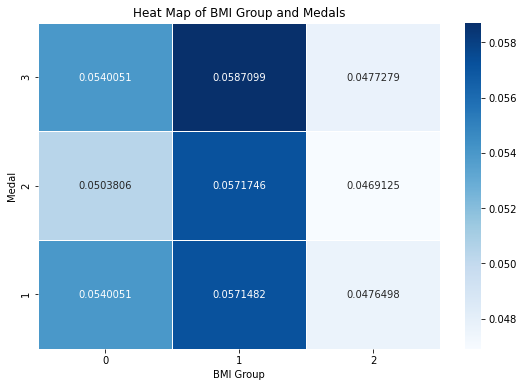

In [417]:
bmi_medals_ratio = df_olympics_final.groupby(['BMI Group','Medal'],as_index=False)['Medal'].count()

x = [0,1,2,3,0,1,2,3,0,1,2,3]
bmi_medals_ratio["Type"]=x
count_bmi0=bmi_medals_ratio[bmi_medals_ratio["BMI Group"]==0]['Medal'].sum()
count_bmi1=bmi_medals_ratio[bmi_medals_ratio["BMI Group"]==1]['Medal'].sum()
count_bmi2=bmi_medals_ratio[bmi_medals_ratio["BMI Group"]==2]['Medal'].sum()
x0=bmi_medals_ratio[bmi_medals_ratio["BMI Group"]==0]["Medal"]/count_bmi0
x1=bmi_medals_ratio[bmi_medals_ratio["BMI Group"]==1]["Medal"]/count_bmi1
x2=bmi_medals_ratio[bmi_medals_ratio["BMI Group"]==2]["Medal"]/count_bmi2
temp=pd.concat([x0, x1, x2],axis=0)
bmi_medals_ratio["Medal"]=temp
bmi_medals_ratio=bmi_medals_ratio[bmi_medals_ratio['Type']!=0]

medals = bmi_medals_ratio.pivot("Type", "BMI Group", "Medal")

f, ax = plt.subplots(figsize=(9, 6))
plt.title("Heat Map of BMI Group and Medals")
sns.heatmap(medals, annot=True,  linewidths=.5, ax=ax,cmap='Blues', fmt='g')
ax.invert_yaxis()
ax.set_ylabel("Medal")
plt.show()




### Research question 3: The relation between the hosting city and the winning teams?

Here we calculated the average medals won per year for each of the hosting countries playing in the same country or in any other countries. The results showed that playing at home or away does not have the same effect on all countries; some countries perform better at home while others perform better playing away.

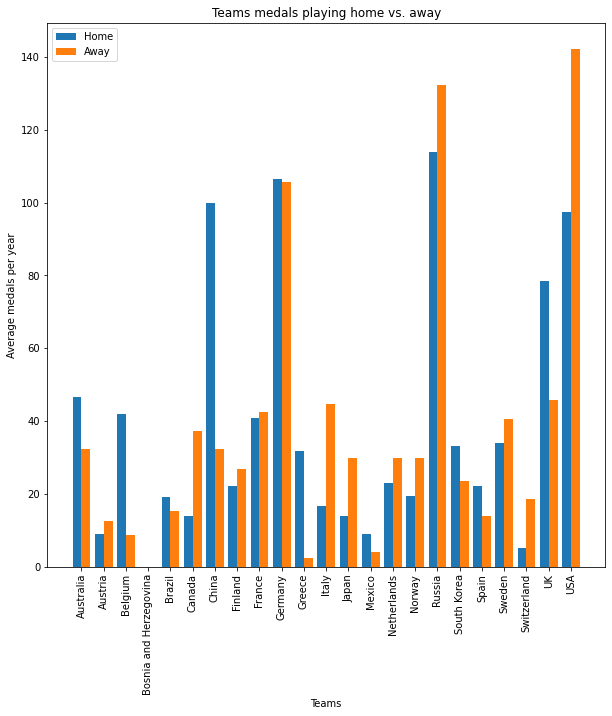

In [418]:
holding_countries =  df_olympics_final["Hosting Country"].unique()
same_country = df_olympics_final[(df_olympics_final["Hosting Country"] == df_olympics_final["Region"]) & (df_olympics_final.Region.isin(holding_countries))]
different_country = df_olympics_final[(df_olympics_final["Hosting Country"] != df_olympics_final["Region"]) & (df_olympics_final.Region.isin(holding_countries))]

same_country=same_country.drop_duplicates(subset=['Region','Year','Event','Medal'])
different_continent=different_country.drop_duplicates(subset=['Region','Year','Event','Medal'])

num_years_same = same_country.groupby('Region')['Year'].nunique()
num_years_different = different_country.groupby('Region')['Year'].nunique()

filtered_1 = same_country[same_country["Medal"] != 0]
filtered_2 = different_country[different_country["Medal"] != 0]

same_country_each = filtered_1.groupby(["Region"])['Medal'].count()
different_country_each = filtered_2.groupby(["Region"])['Medal'].count()

same_country_each = same_country_each.reindex(holding_countries)
same_country_each.fillna(0)
different_country_each = different_country_each.reindex(holding_countries)

averge_medals_per_year_home = same_country_each.divide(num_years_same, fill_value=0)
averge_medals_per_year_away = different_country_each.divide(num_years_different, fill_value=0)


X_axis = np.arange(len(same_country_each))
plt.figure(figsize=(10,10))
plt.ylabel('Average medals per year')
plt.xlabel('Teams')
plt.title("Teams medals playing home vs. away")
plt.bar(X_axis - 0.2, averge_medals_per_year_home.values, 0.4, label = 'Home')
plt.bar(X_axis + 0.2, averge_medals_per_year_away.values, 0.4, label = 'Away')
plt.xticks(X_axis, averge_medals_per_year_away.index)
plt.xticks(rotation = 90, )
plt.legend()
plt.show()

### Research question 4: The relation between the hosting continents and the winning teams? (to see if a country playing in a city in the same continent improve its chances in winning medals)

In this question, we see whether each continent perform better while playing at home/away, and as we can see all continents perform better at home except europe; which can be due to playing in approximately the same timezone/weather and not having to travel long distances to attend the olympics.

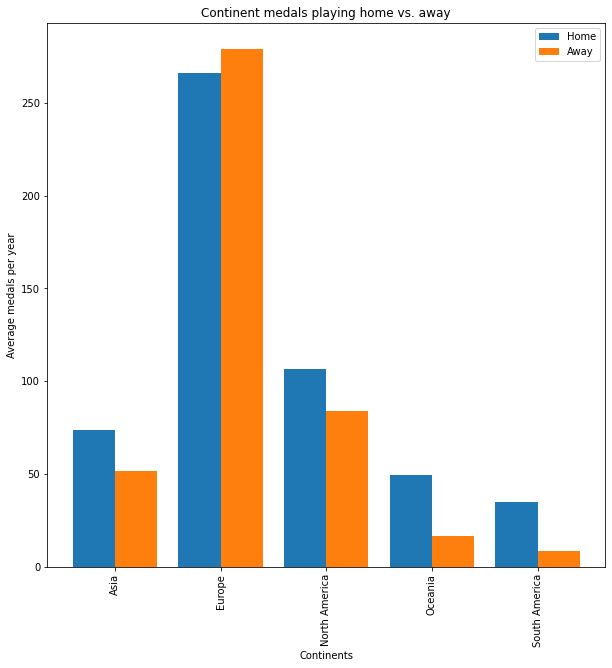

In [419]:
holding_continent =  df_olympics_final["Hosting Continent"].unique()
same_continent = df_olympics_final[(df_olympics_final["Hosting Continent"] == df_olympics_final["Continent"]) & (df_olympics_final.Continent.isin(holding_continent))]
different_continent = df_olympics_final[(df_olympics_final["Hosting Continent"] != df_olympics_final["Continent"]) & (df_olympics_final.Continent.isin(holding_continent))]

same_continent=same_continent.drop_duplicates(subset=['Continent','Year','Event','Medal'])
different_continent=different_continent.drop_duplicates(subset=['Continent','Year','Event','Medal'])

num_years_same = same_continent.groupby('Continent')['Year'].nunique()
num_years_different = different_continent.groupby('Continent')['Year'].nunique()

filtered_1 = same_continent[same_continent["Medal"] != 0]
filtered_2 = different_continent[different_continent["Medal"] != 0]

same_continent_each = filtered_1.groupby(["Continent"])['Medal'].count()
different_continent_each = filtered_2.groupby(["Continent"])['Medal'].count()

same_continent_each = same_continent_each.reindex(holding_continent)
same_continent_each.fillna(0)
different_continent_each = different_continent_each.reindex(holding_continent)

averge_medals_per_year_home = same_continent_each.divide(num_years_same, fill_value=0)
averge_medals_per_year_away = different_continent_each.divide(num_years_different, fill_value=0)


X_axis = np.arange(len(same_continent_each))
plt.figure(figsize=(10,10))
plt.ylabel('Average medals per year')
plt.xlabel('Continents')
plt.title("Continent medals playing home vs. away")
plt.bar(X_axis - 0.2, averge_medals_per_year_home.values, 0.4, label = 'Home')
plt.bar(X_axis + 0.2, averge_medals_per_year_away.values, 0.4, label = 'Away')
plt.xticks(X_axis, averge_medals_per_year_away.index)
plt.xticks(rotation = 90, )
plt.legend()
plt.show()

### Question 5: What are the sports with the highest/lowest average bmi among its medalists.

In this question, we just observe which sports have the highest/lowest bmi among its medalists.

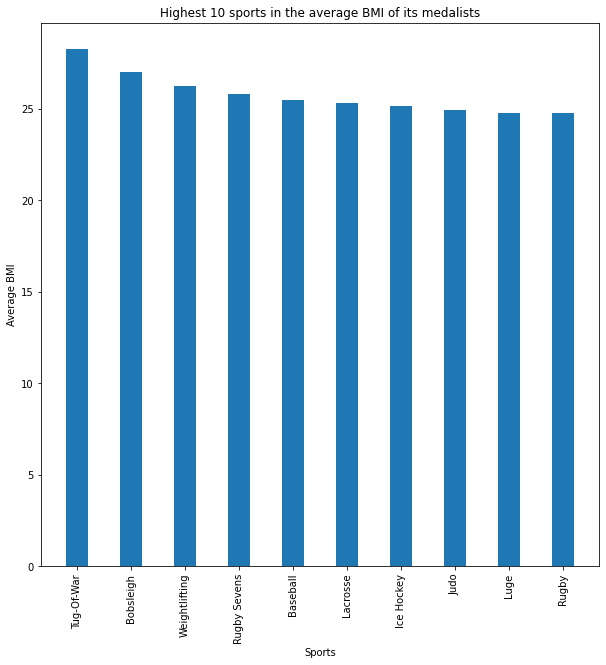

In [420]:
medalists = df_olympics_final[df_olympics_final['Medal'] != 0]
avgBMI=medalists.groupby(['Sport'])["BMI"].mean().nlargest(10)
topAverageBMI=medalists[medalists["Sport"].isin(avgBMI.index)]

average_BMI = topAverageBMI.groupby(['Sport'])["BMI"].mean()
# gold = goldP.reindex(top10MedalAth.index)
average_BMI=average_BMI.reindex(avgBMI.index)

X_axis = np.arange(len(average_BMI))
plt.figure(figsize=(10,10))
plt.ylabel('Average BMI')
plt.xlabel('Sports')
plt.title("Highest 10 sports in the average BMI of its medalists")
plt.bar(X_axis , average_BMI.values, 0.4)
plt.xticks(X_axis, average_BMI.index)
plt.xticks(rotation = 90, )
plt.show()

No handles with labels found to put in legend.


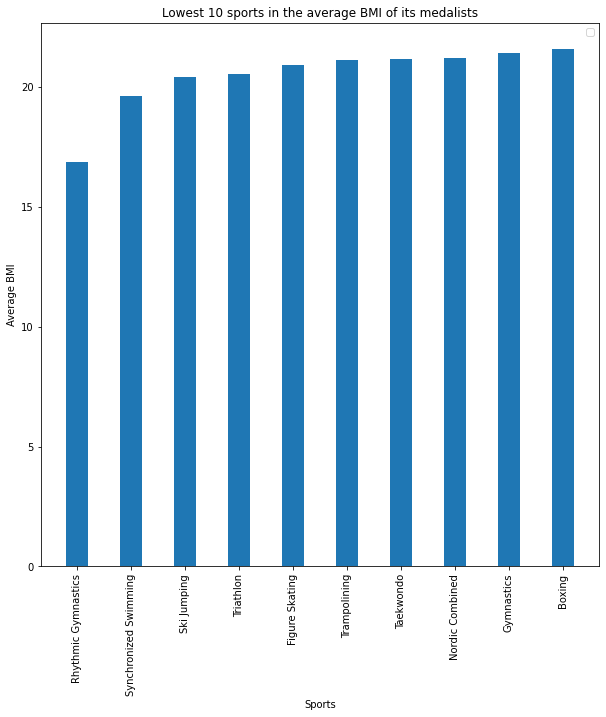

In [421]:
medalists = df_olympics_final[df_olympics_final['Medal'] != 0]
avgBMI=medalists.groupby(['Sport'])["BMI"].mean().nsmallest(10)
bottomAverageBMI=medalists[medalists["Sport"].isin(avgBMI.index)]

average_BMI = bottomAverageBMI.groupby(['Sport'])["BMI"].mean()
# gold = goldP.reindex(top10MedalAth.index)
average_BMI=average_BMI.reindex(avgBMI.index)

X_axis = np.arange(len(average_BMI))
plt.figure(figsize=(10,10))
plt.ylabel('Average BMI')
plt.xlabel('Sports')
plt.title("Lowest 10 sports in the average BMI of its medalists")
plt.bar(X_axis , average_BMI.values, 0.4)
plt.xticks(X_axis, average_BMI.index)
plt.xticks(rotation = 90, )
plt.legend()
plt.show()

### Question 6: What is the effect of the number of participants for each country on their win rate?

In [422]:
df_country_participants=df_olympics_final.groupby(["NOC", "Year"]).size().to_frame(name="Participants_Number").reset_index()
df_country_medals=df_olympics_final.groupby(["NOC", "Year"])['Medal'].apply(lambda x: (x>0).sum()).reset_index(name='Medal_Count')
df_country_participants["Medal_Count"]=df_country_medals["Medal_Count"]

In [423]:
df_country_participants.rename(columns={"Medal_Count":"Win_Rate"}, inplace=True, errors="raise")
df_country_participants["Win_Rate"]=df_country_participants["Win_Rate"]/df_country_participants["Participants_Number"]

It was logical to see that the number of Medals (on average) would increase with the number of participants. However, the winrate also increased with the increase as can be seen from the best-fit line that represents a small positive correlation between the number of participants or sports that the country has participated in and the win-rate which means that the ratio of winning actually increases with the increase of the number of olympic participations. This could be attributed to a number of reasons like less pressure to perform and more willingness to stand out when there are more participants from one's country. We also use the pearson correlation that indicates that there is a very slight relation between higher participants number and higher winrate.

C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Pearsons correlation: 0.409


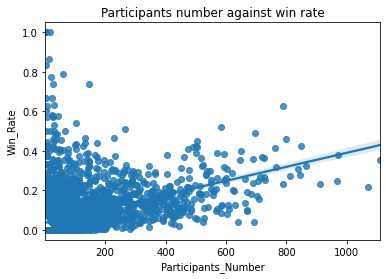

In [424]:
x=sns.regplot( df_country_participants["Participants_Number"], df_country_participants["Win_Rate"])
x.set_title("Participants number against win rate")

# # Apply the pearsonr() 
corr,_  = pearsonr(df_country_participants["Participants_Number"], df_country_participants["Win_Rate"]) 
print('Pearsons correlation: %.3f' % corr) 

### Research question 7:  What is the effect of the number of events a player participates in each year on his chances in winning medals (whether a player participating in multiple events in the same season increase/decrease/have no effect on him winning medals)?

In [425]:
df_participations_per_year=df_olympics_final.groupby(["Name", "Year"]).size().to_frame(name="Participations").reset_index()
df_medals_counted_per_year=df_olympics_final.groupby(["Name", "Year"])['Medal'].apply(lambda x: (x>0).sum()).reset_index(name='Medal_Count')
df_medals_counted_per_year["Participations"]=df_participations_per_year["Participations"]

As we can see in the below figure, higher number of events an athlete participates in in a single olympics have no clear effect on his winrate, since the performance of athletes didn't change with the change in the number of events with only one exception. Performance is defined as the sum of medals (where Gold is 3, Silver is 2, Bronze is 1 and no medals is 0) over the number of events participated in; which means that higher performance is better.

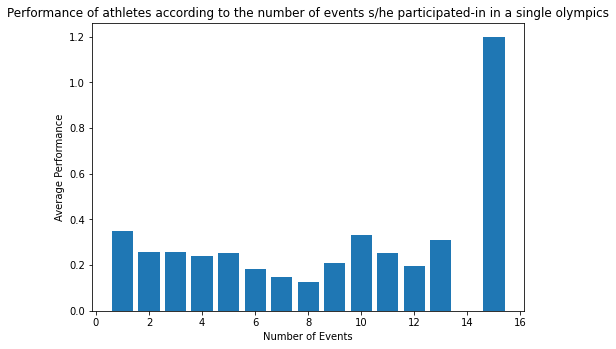

In [426]:
df_medals_counted_per_year=df_olympics_final.groupby(["Name", "Year"])['Medal'].sum().reset_index(name='Performance')
df_medals_counted_per_year["Participations"]=df_participations_per_year["Participations"]
df_participation_performance=df_medals_counted_per_year.groupby("Participations")["Performance"].mean()
df_participation_performance=df_participation_performance.head(15)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = range(1,16)
temp=df_participation_performance.values/langs
plt.title("Performance of athletes according to the number of events s/he participated-in in a single olympics")
ax.bar(langs,temp)
ax.set_ylabel("Average Performance")
ax.set_xlabel("Number of Events")
plt.show()


### Research Question 8:  Trends in medalists, Is there a significant trait/physical attribute among medal winners in all Olympic games that contribubtes to their success one way or another? If so, What is the ratio between the availability of this feature in medalists in comparison to other athletes

In [427]:
Medalfilter = df_olympics[df_olympics['Medal'] != 0]
top10Sports = Medalfilter.groupby(['Sport'])['Medal'].count().nlargest(10) #top 10 sports in regards to the number of medals won in each
top10Sports.index

Index(['Athletics', 'Swimming', 'Rowing', 'Gymnastics', 'Fencing', 'Football',
       'Ice Hockey', 'Hockey', 'Wrestling', 'Cycling'],
      dtype='object', name='Sport')

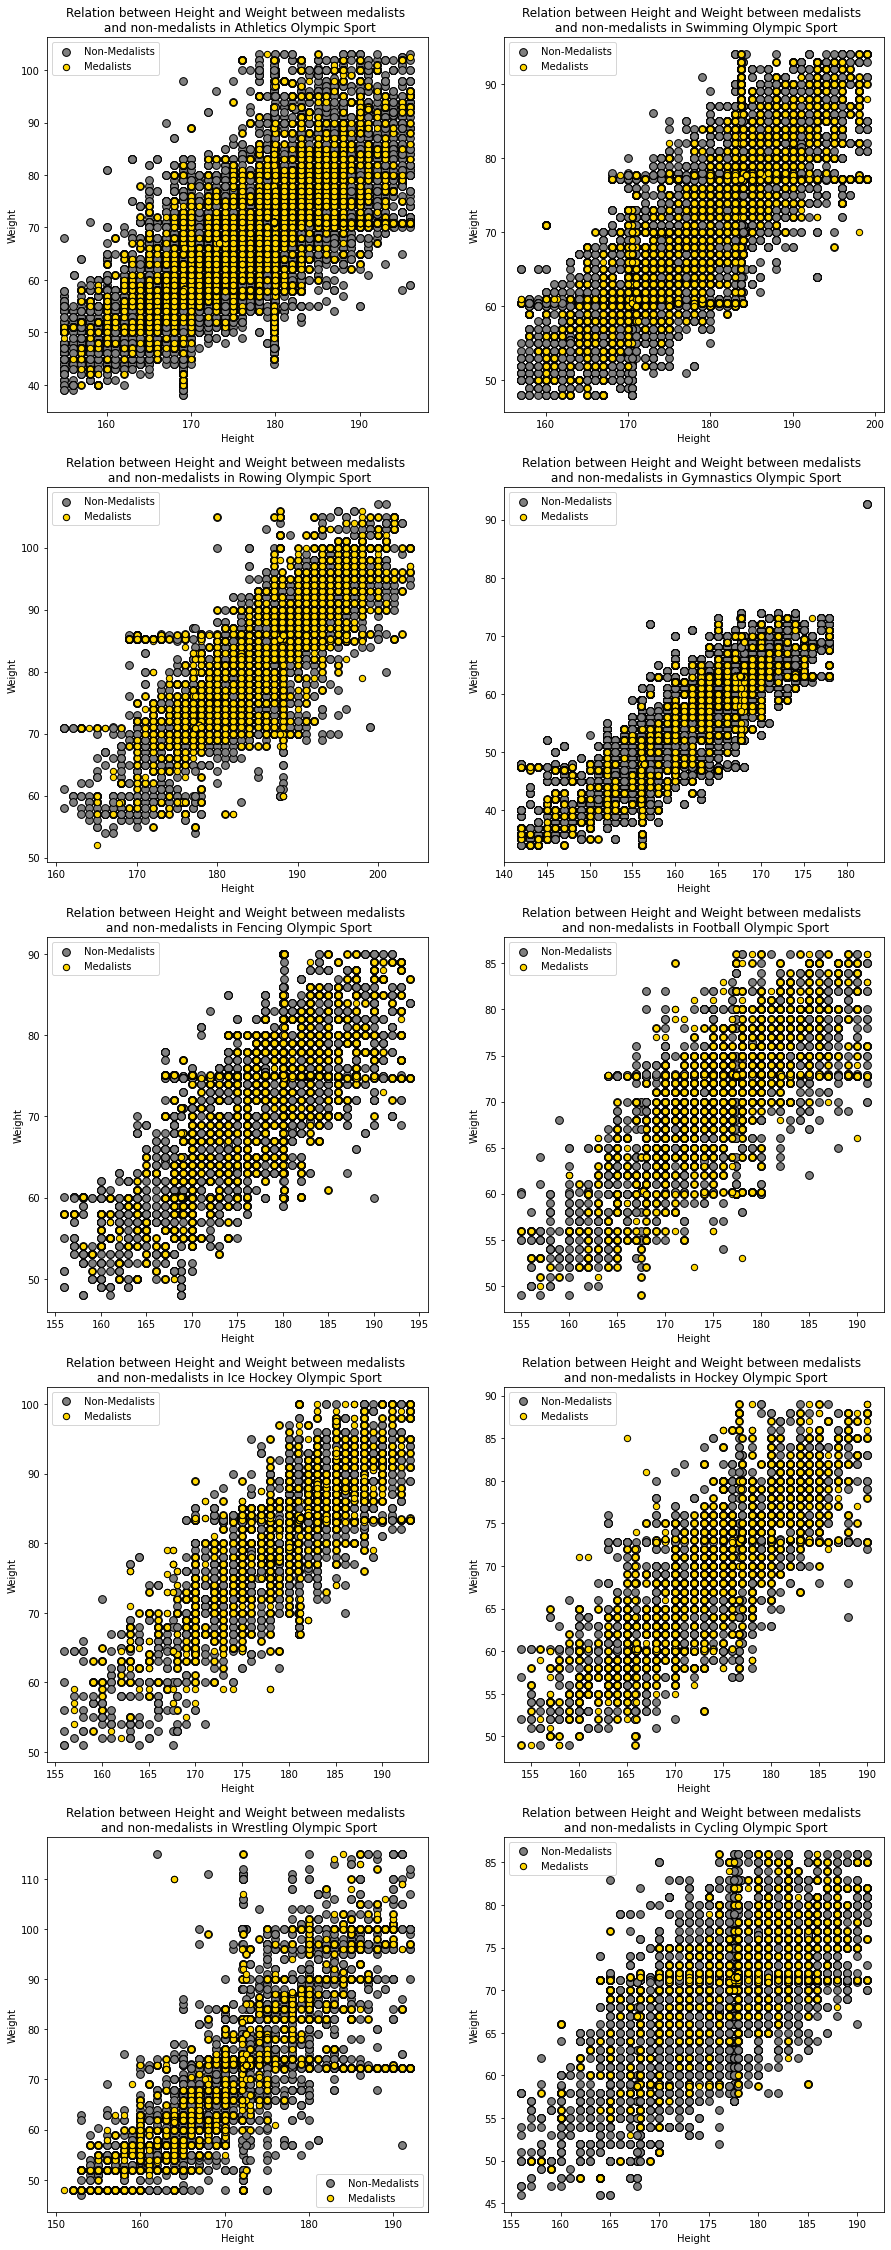

In [428]:
fig, ax = plt.subplots(nrows=5, ncols=2,figsize=(15,40))
indx = 0

for row in ax:
    for col in row:
        
        sport = top10Sports.index[indx]
        AthleticSport = df_olympics[df_olympics['Sport'] == sport]
        AthleticSport['Medal']

        # plot the level sets of the decision function

        winner_mask = [True if l != 0 else False for l in AthleticSport['Medal'].values]
        nonwinner_mask = [True if l == 0 else False for l in AthleticSport['Medal'].values]

        col.title.set_text("Relation between Height and Weight between medalists \n and non-medalists in %s Olympic Sport" %(sport))
        # inliers

        X = AthleticSport[['Height','Weight']].values
        
                # outliers
        b = col.scatter(X[nonwinner_mask, 0], X[nonwinner_mask, 1], c = 'gray',
                edgecolor = 'k', s = 60,label='Non-Medalists')
        
        a = col.scatter(X[winner_mask, 0], X[winner_mask, 1], c = 'gold',
                edgecolor = 'k', s = 40,label='Medalists')

        
        col.axis('tight')
        col.set_xlabel('Height')
        col.set_ylabel('Weight')
        col.legend()
        
        indx+=1

plt.show()


In the above Ten subplots, We analyzed whether there was a general direction in which Height and Weight (specifically in this  case), enhances the chance of winning an olympic medal in the top 10 olymics sports(In term of medals won). but it turns out that physical attributes such as Height and weight have little (if any) impact on medal winners. hence could  not be considered a Trend.

However, Could height and weight be considered a 'Trend' OR evolving  - over the years between medalists? That's what the next section is discussing

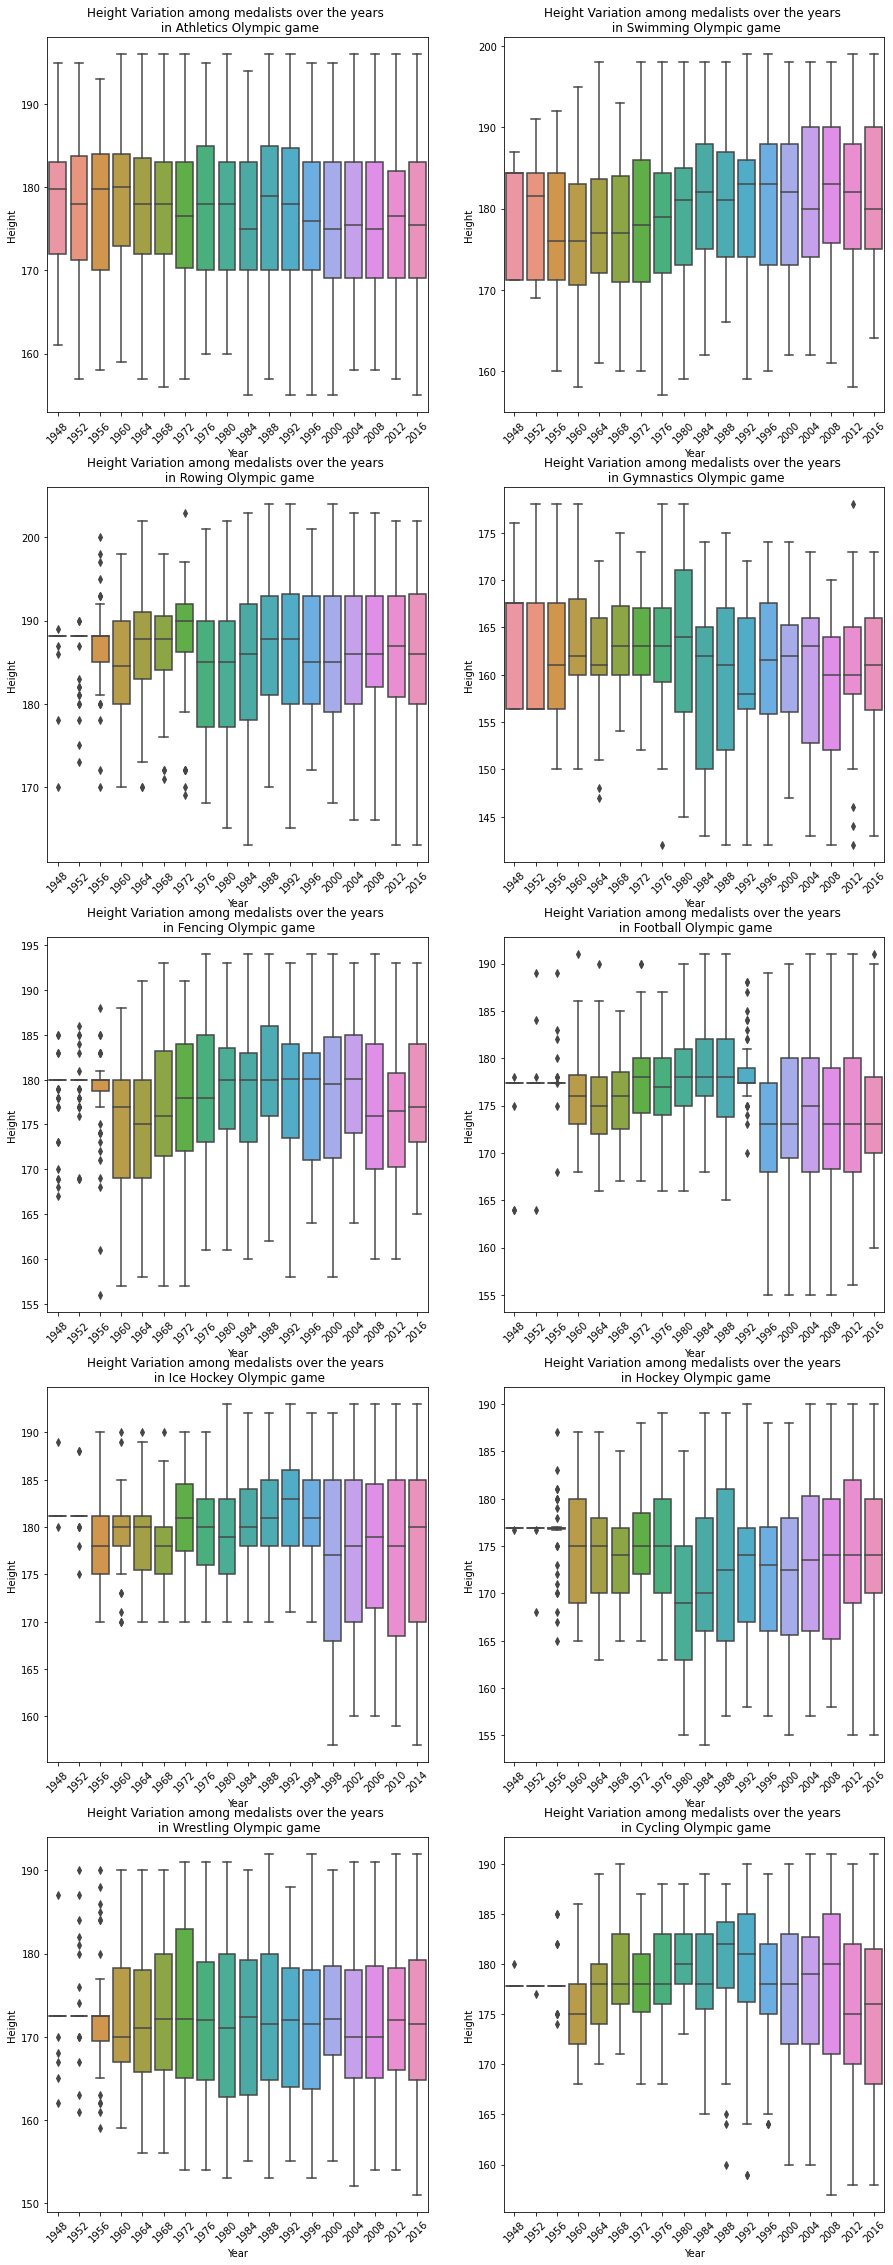

In [429]:
fig, axes = plt.subplots(nrows=5, ncols=2,figsize=(15,40))
indx = 0
# Iterating through axes and names
for ax in axes.flatten():
    sport = top10Sports.index[indx]
    sports = Medalfilter[(Medalfilter['Sport'] == sport) & (Medalfilter.Year>=1948)]
    ax.set_xticklabels([],rotation=45)
    ax.title.set_text("Height Variation among medalists over the years \n in %s Olympic game" %(sport))
    sns.boxplot(x='Year',y='Height', data=sports, orient='v', ax=ax)
    indx+=1

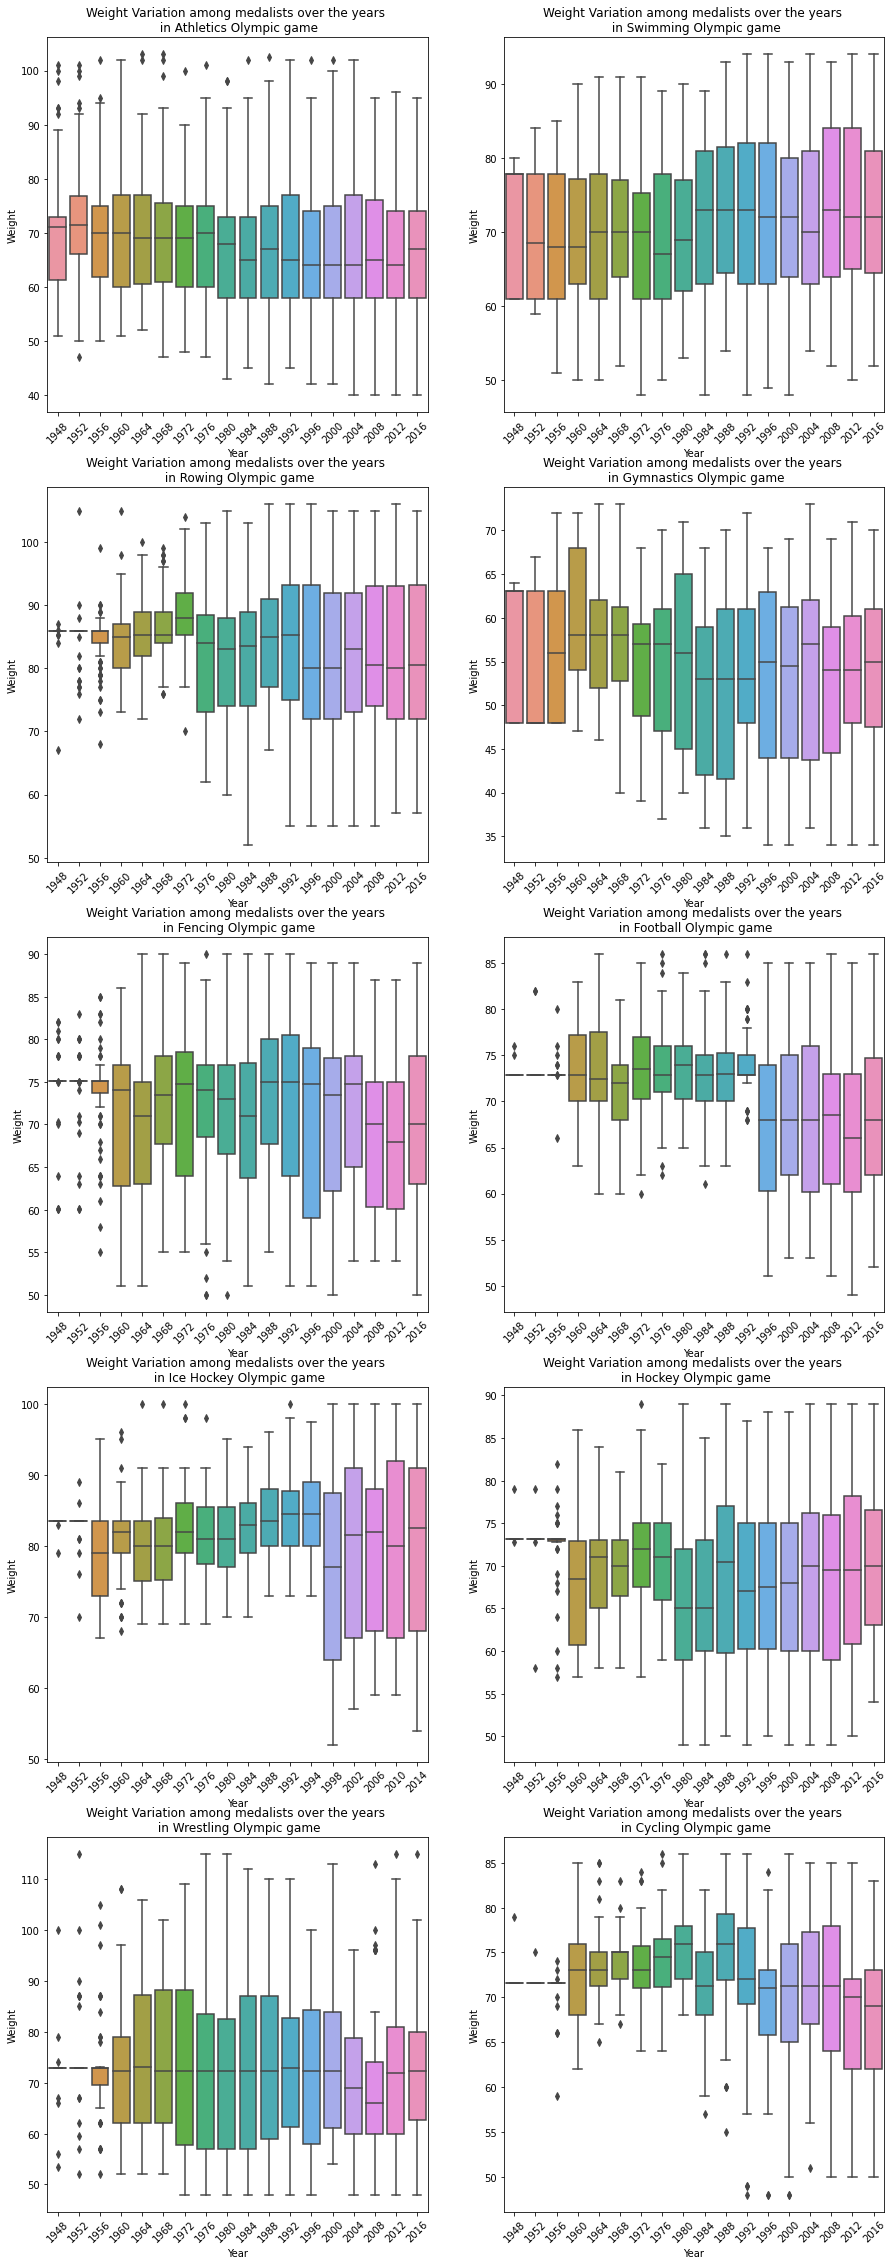

In [430]:
fig, axes = plt.subplots(nrows=5, ncols=2,figsize=(15,40))
indx = 0
# Iterating through axes and names
for ax in axes.flatten():
    sport = top10Sports.index[indx]
    sports = Medalfilter[(Medalfilter['Sport'] == sport) & (Medalfilter.Year>=1948)]
    ax.set_xticklabels([],rotation=45)
    ax.title.set_text("Weight Variation among medalists over the years \n in %s Olympic game" %(sport))
    sns.boxplot(x='Year',y='Weight', data=sports, orient='v', ax=ax)
    indx+=1

From the above 20 boxplots visualizing how weight and height changed over the years among medalists for the top ten different olympic games, Trends in some olympic games is noticable, Like Football in which height and weight among the medalists have  noticeably decreased starting from 1996. The same could be said about Ice hockey, Hockey and cycling medalist atheletes with different degrees of variation between them. However, The Initial Research Question was inquiring if there exists a trend among medalists that evolved over time whether its a physical feature/s or trait, Yet, from the first scatter plot, no pattern or a certain trend that differentiate medalists to non-medalists in those Olympic games can be deduced. To wrap-up, Is there a certain Trend that evolved over time in some olympic games? Yes. Does this trend belongs to the medalist atheletes only? No. We used the zoomed in graphs (that do not start from 0 on the y-axis) since we were just looking for any changes in weight/height, and not for the severity of these changes.

### Research Question 9:  What is the performance of each continent in each Season?

In [431]:
def df_MedalWonEachContinent(Season):
    continents = pd.unique(df_olympics_final['Continent'])

    yearFilter = df_olympics_final[(df_olympics_final["Year"] >= 1948) & (df_olympics_final["Season"] == Season)]
    Years = pd.unique(yearFilter["Year"])
    Years.sort()
    
    continentMedalFilter = df_olympics_final[(df_olympics_final['Medal'] != 0)]
    
    medal = continentMedalFilter[(continentMedalFilter['Season'] == Season)].groupby(['Year','Continent','Event'])["Medal"].nunique()
    
    yearArr = []
    ContinentArr = []
    MedalArr = []
    
    for year in Years:
        for continent in continents:
        
            exist = medal[year].get(continent)
            
            if exist is None:
                yearArr.append(year)
                ContinentArr.append(continent)
                MedalArr.append(0)
            else:
                yearArr.append(year)
                ContinentArr.append(continent)
                med = sum(medal[year][continent].values)
                MedalArr.append(med)
                
    data = {'Years':yearArr,
       'Continent':ContinentArr,
           'Medals': MedalArr}
        
    
    df = pd.DataFrame(data)
    return df

In [432]:
all_df = df_MedalWonEachContinent('Winter')
Asia = all_df[all_df['Continent'] == 'Asia']['Medals'].values
Europe = all_df[all_df['Continent'] == 'Europe']['Medals'].values
NorthAmerica = all_df[all_df['Continent'] == 'North America']['Medals'].values
Africa = all_df[all_df['Continent'] == 'Africa']['Medals'].values
SouthAmerica = all_df[all_df['Continent'] == 'South America']['Medals'].values
Oceania = all_df[all_df['Continent'] == 'Oceania']['Medals'].values
Other = all_df[all_df['Continent'] == 'Other']['Medals'].values

allYears = pd.unique(all_df['Years'])

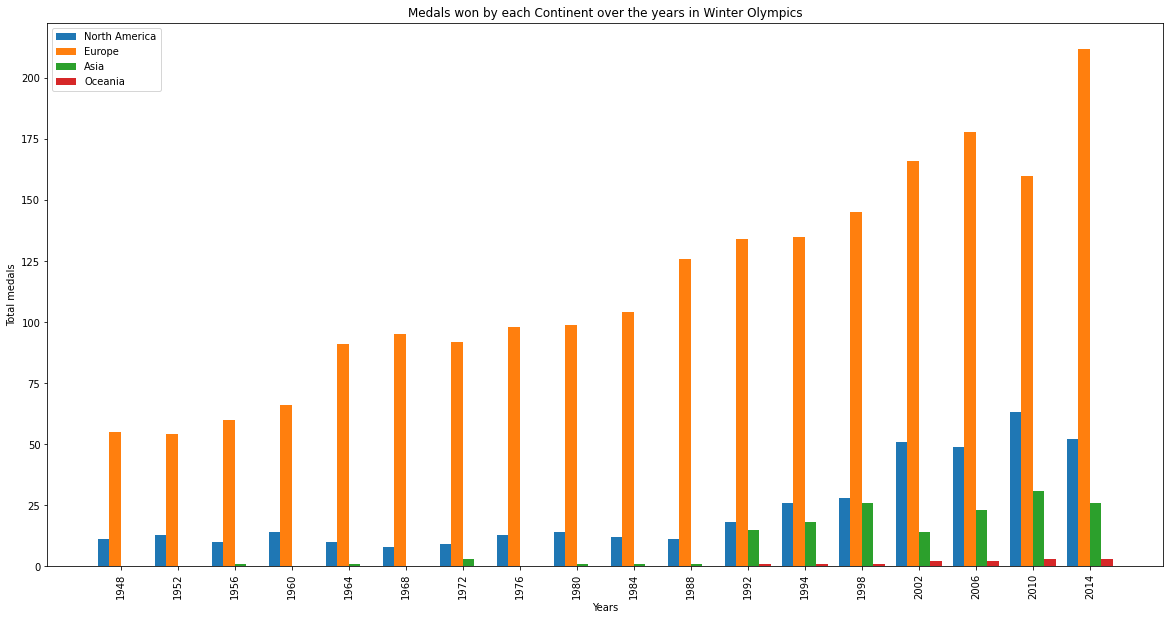

In [433]:
X_axis = np.arange(len(allYears))
plt.figure(figsize=(20,10))
plt.ylabel('Total medals')
plt.xlabel('Years')
plt.title("Medals won by each Continent over the years in Winter Olympics")
plt.bar(X_axis - 0.3, NorthAmerica, 0.2, label = 'North America')
plt.bar(X_axis - 0.1, Europe, 0.2, label = 'Europe')
plt.bar(X_axis + 0.1, Asia, 0.2, label = 'Asia')
plt.bar(X_axis + 0.3, Oceania, 0.2, label = 'Oceania')

plt.xticks(X_axis, allYears)
plt.xticks(rotation = 90, )
plt.legend()
plt.show()

The above figure is a barplot visualization of the performance(In terms of Medals won) of each continent in the winter Olymplics. Europe has by far the best success in winter Olympics in all years, Next barplot will show the performance of continents but in the Summer Olympics

In [434]:
summer_df = df_MedalWonEachContinent('Summer')
Asia = summer_df[summer_df['Continent'] == 'Asia']['Medals'].values
Europe = summer_df[summer_df['Continent'] == 'Europe']['Medals'].values
NorthAmerica = summer_df[summer_df['Continent'] == 'North America']['Medals'].values
Africa = summer_df[summer_df['Continent'] == 'Africa']['Medals'].values
SouthAmerica = summer_df[summer_df['Continent'] == 'South America']['Medals'].values
Oceania = summer_df[summer_df['Continent'] == 'Oceania']['Medals'].values
Other = summer_df[summer_df['Continent'] == 'Other']['Medals'].values

allYears = pd.unique(summer_df['Years'])

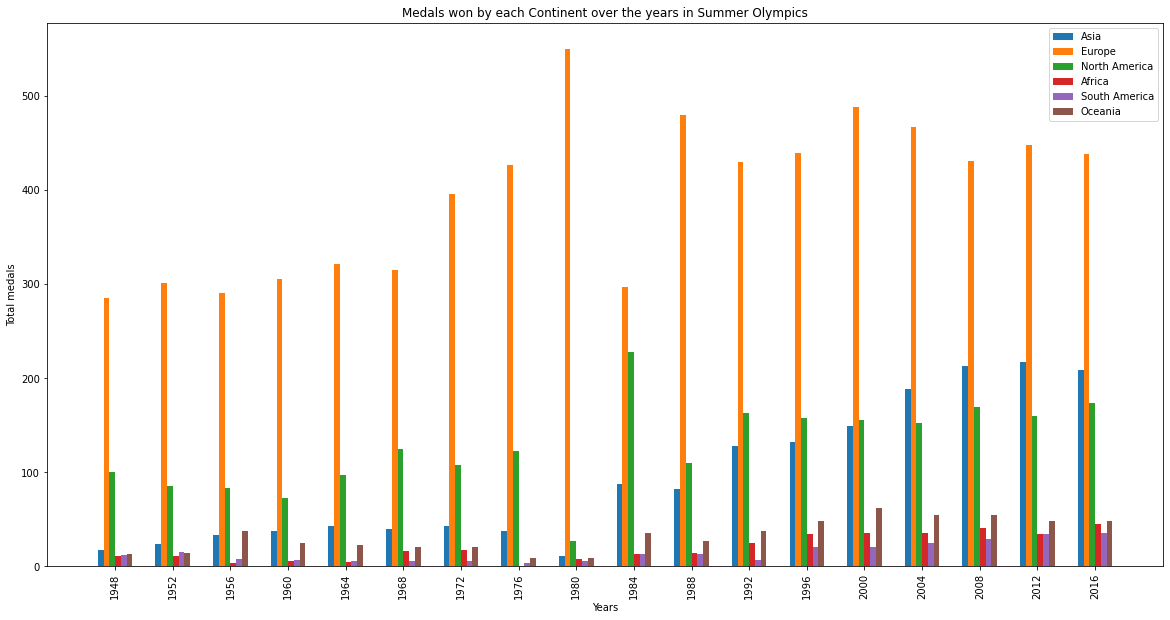

In [435]:
X_axis = np.arange(len(allYears))
plt.figure(figsize=(20,10))
plt.ylabel('Total medals')
plt.xlabel('Years')
plt.title("Medals won by each Continent over the years in Summer Olympics")
plt.bar(X_axis - 0.25, Asia, 0.1, label = 'Asia')
plt.bar(X_axis - 0.15, Europe, 0.1, label = 'Europe')
plt.bar(X_axis - 0.05, NorthAmerica, 0.1, label = 'North America')
plt.bar(X_axis + 0.05, Africa, 0.1, label = 'Africa')
plt.bar(X_axis + 0.15, SouthAmerica, 0.1, label = 'South America')
plt.bar(X_axis + 0.25, Oceania, 0.1, label = 'Oceania')

plt.xticks(X_axis, allYears)
plt.xticks(rotation = 90, )
plt.legend()
plt.show()

### Research Question 10:  What are the countries with the worst/best participants-to-medal ratio?

In [436]:
def medalsWonByEachCountry(Season):
    countries = pd.unique(df_olympics_final['Region'])
    
    medalsFilterForAll = df_olympics_final[df_olympics_final['Medal'] != 0]
    medal = medalsFilterForAll[(medalsFilterForAll['Season'] == Season)].groupby(['Region','Year','Event'])["Medal"].nunique()
    
    particpantsForEach = df_olympics_final[(df_olympics_final['Season'] == Season)].groupby(['Region','Year','ID']).size()
    medals = []
    participants = []
    
    for country in countries:
        
        existMedal = medal.get(country)
        existParticipant = particpantsForEach.get(country)
        
        if(existParticipant is None):
            medals.append(0)
            participants.append(0)
        else:
            if(existMedal is None):
                participants.append(len(existParticipant))
                medals.append(0)
            else:
                participants.append(len(existParticipant))
                medals.append(sum(existMedal))
            
    data = {'Countries': countries,
            'Participants':participants,
           'Medals': medals}
    
    df = pd.DataFrame(data)
    return df

Worst performing countries in Winter (the countries that have never won a medal while sending the most participants)

In [437]:
worstMTR = medalsWonByEachCountry('Winter')
worstMTR = worstMTR[(worstMTR['Participants'] != 0) & (worstMTR['Medals'] == 0)].nlargest(10, 'Participants')
worstMTR

,Countries,Participants,Medals
19,Argentina,176,0
22,Greece,95,0
130,Iceland,94,0
24,Turkey,86,0
25,Chile,73,0
186,Taiwan,64,0
123,Mongolia,52,0
126,Lithuania,50,0
70,Brazil,46,0
177,Andorra,46,0


Text(0.5, 1.0, 'Number of participants from countries that won 0 medals in Winter olympics')

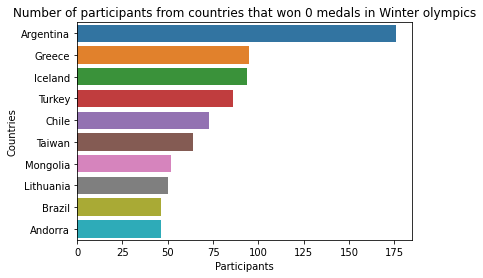

In [438]:
figure=sns.barplot(y = worstMTR['Countries'],x = worstMTR['Participants'])
figure.set_title("Number of participants from countries that won 0 medals in Winter olympics")

Worst performing countries in Summer (the countries that have never won a medal while sending the most participants)

In [439]:
worstMTR = medalsWonByEachCountry('Summer')
worstMTR = worstMTR[(worstMTR['Participants'] != 0) & (worstMTR['Medals'] == 0)].nlargest(10, 'Participants')
worstMTR

,Countries,Participants,Medals
99,Angola,242,0
104,El Salvador,144,0
107,Honduras,142,0
166,San Marino,121,0
27,Nicaragua,106,0
136,Malta,103,0
183,Myanmar,103,0
176,Boliva,97,0
156,Madagascar,96,0
68,Republic of Congo,91,0


Text(0.5, 1.0, 'Number of participants from countries that won 0 medals in Summer olympics')

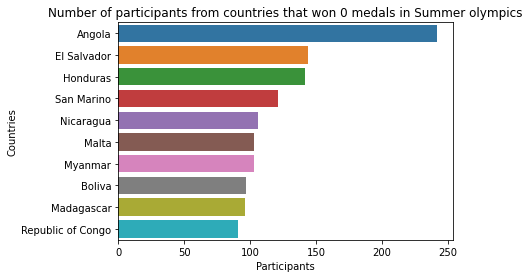

In [440]:
figure=sns.barplot(y = worstMTR['Countries'],x = worstMTR['Participants'])
figure.set_title("Number of participants from countries that won 0 medals in Summer olympics")

Next, we will analyze the countries that have the Best Medal-to-participants ratio

In [441]:
particpants = df_olympics_final[(df_olympics_final['Season'] == 'Winter')].groupby(['Year','Region','ID']).size()        


In [442]:
NewMedalfilter = df_olympics_final[df_olympics_final['Medal'] != 0]
NewMedalfilter
medal = NewMedalfilter[(NewMedalfilter['Season'] == 'Winter')].groupby(['Year','Region','Event'])["Medal"].nunique()

yearFilter = df_olympics_final[df_olympics_final["Year"] >= 1948]
Years = pd.unique(yearFilter["Year"])
Years.sort()

def MedalToParticipantsRatio(year):

    OlympicTeams = pd.unique(yearFilter["Region"])

    ratio = []

    for team in OlympicTeams:
    
        particpantsNum = particpants[year].get(team)
        MedalsForTeam = medal[year].get(team)
    
        if particpantsNum is None:
            ratio.append(0)    
        else:
            if MedalsForTeam is None:
                ratio.append(0)
            else:
                part = len(particpants[year][team])
                med = sum(medal[year][team].values)
                ratio.append(med/part)

    data = {'Team':OlympicTeams,
       'ratio':ratio}
    
    df = pd.DataFrame(data)
    return df



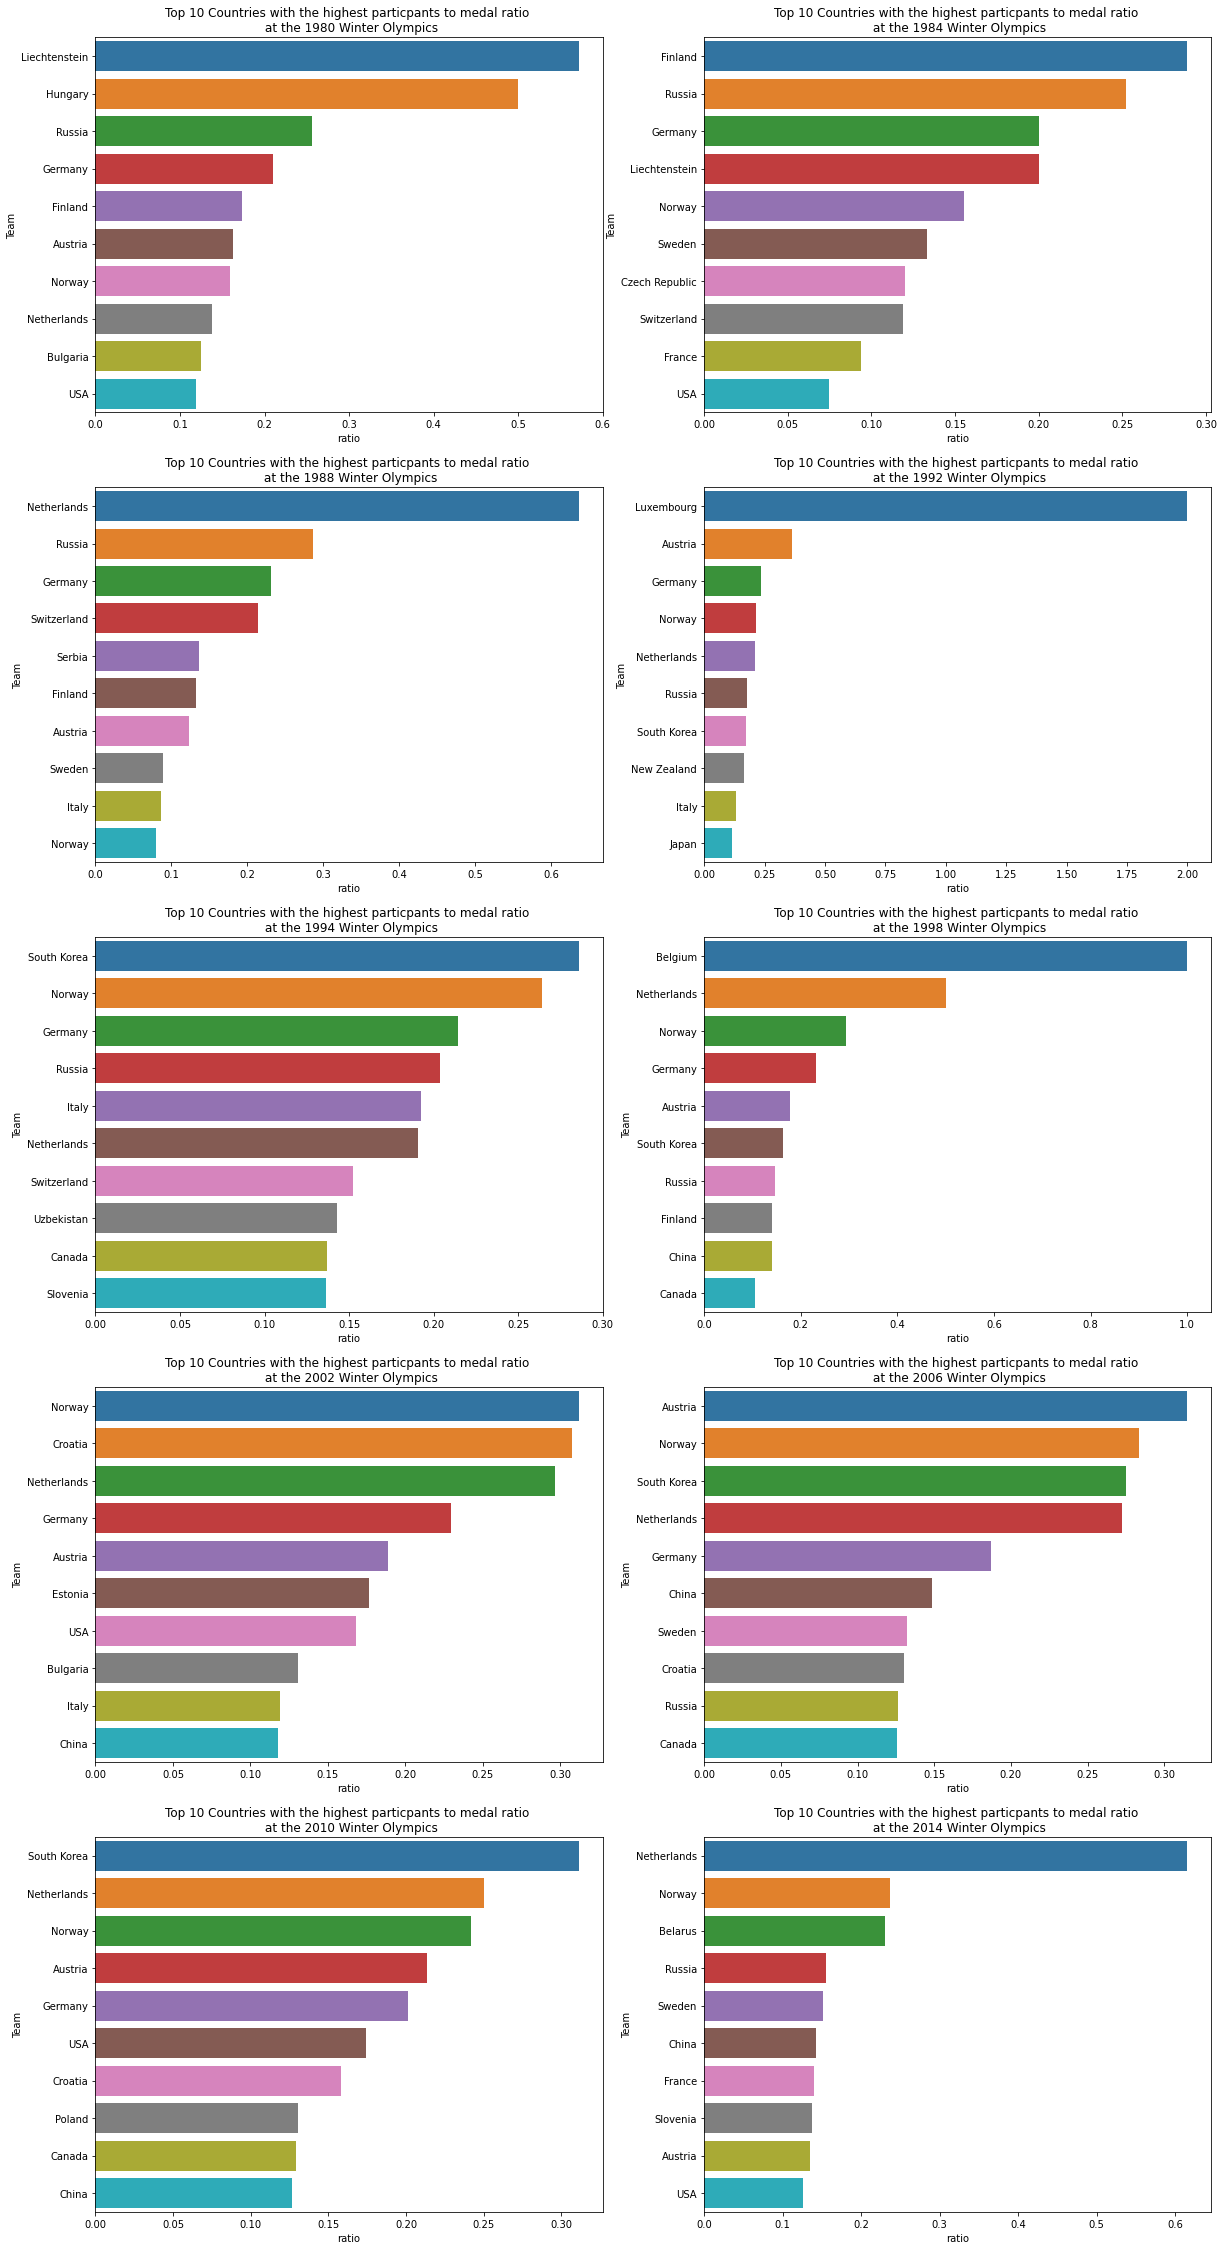

In [443]:
fig, axes = plt.subplots(nrows=5, ncols=2,figsize=(20,40))
indx = 0
years = [1980,1984,1988,1992,1994,1998,2002,2006,2010,2014]
# Iterating through axes and names
for ax in axes.flatten():

    df_ratio = MedalToParticipantsRatio(years[indx])
    highestRatio = df_ratio.nlargest(10, ['ratio'])
    ax.title.set_text('Top 10 Countries with the highest particpants to medal ratio \n at the %s Winter Olympics'%(years[indx]))
    sns.barplot(y = highestRatio['Team'], x=highestRatio['ratio'], data=df_ratio, ax=ax)
    indx+=1

**In The above 10 barplots, we visualize the top 10 Countries with the highest medals-to-participants ratio since the 1980 winter Olympics in Lake Palacid, NY. The ratio is calculated by dividing the number of medals won by each team sent by a country BY the total number of particpents in this team. In the next section We will analyze and visualize the highest medals-to-participants ratio in the Summer Olympics**

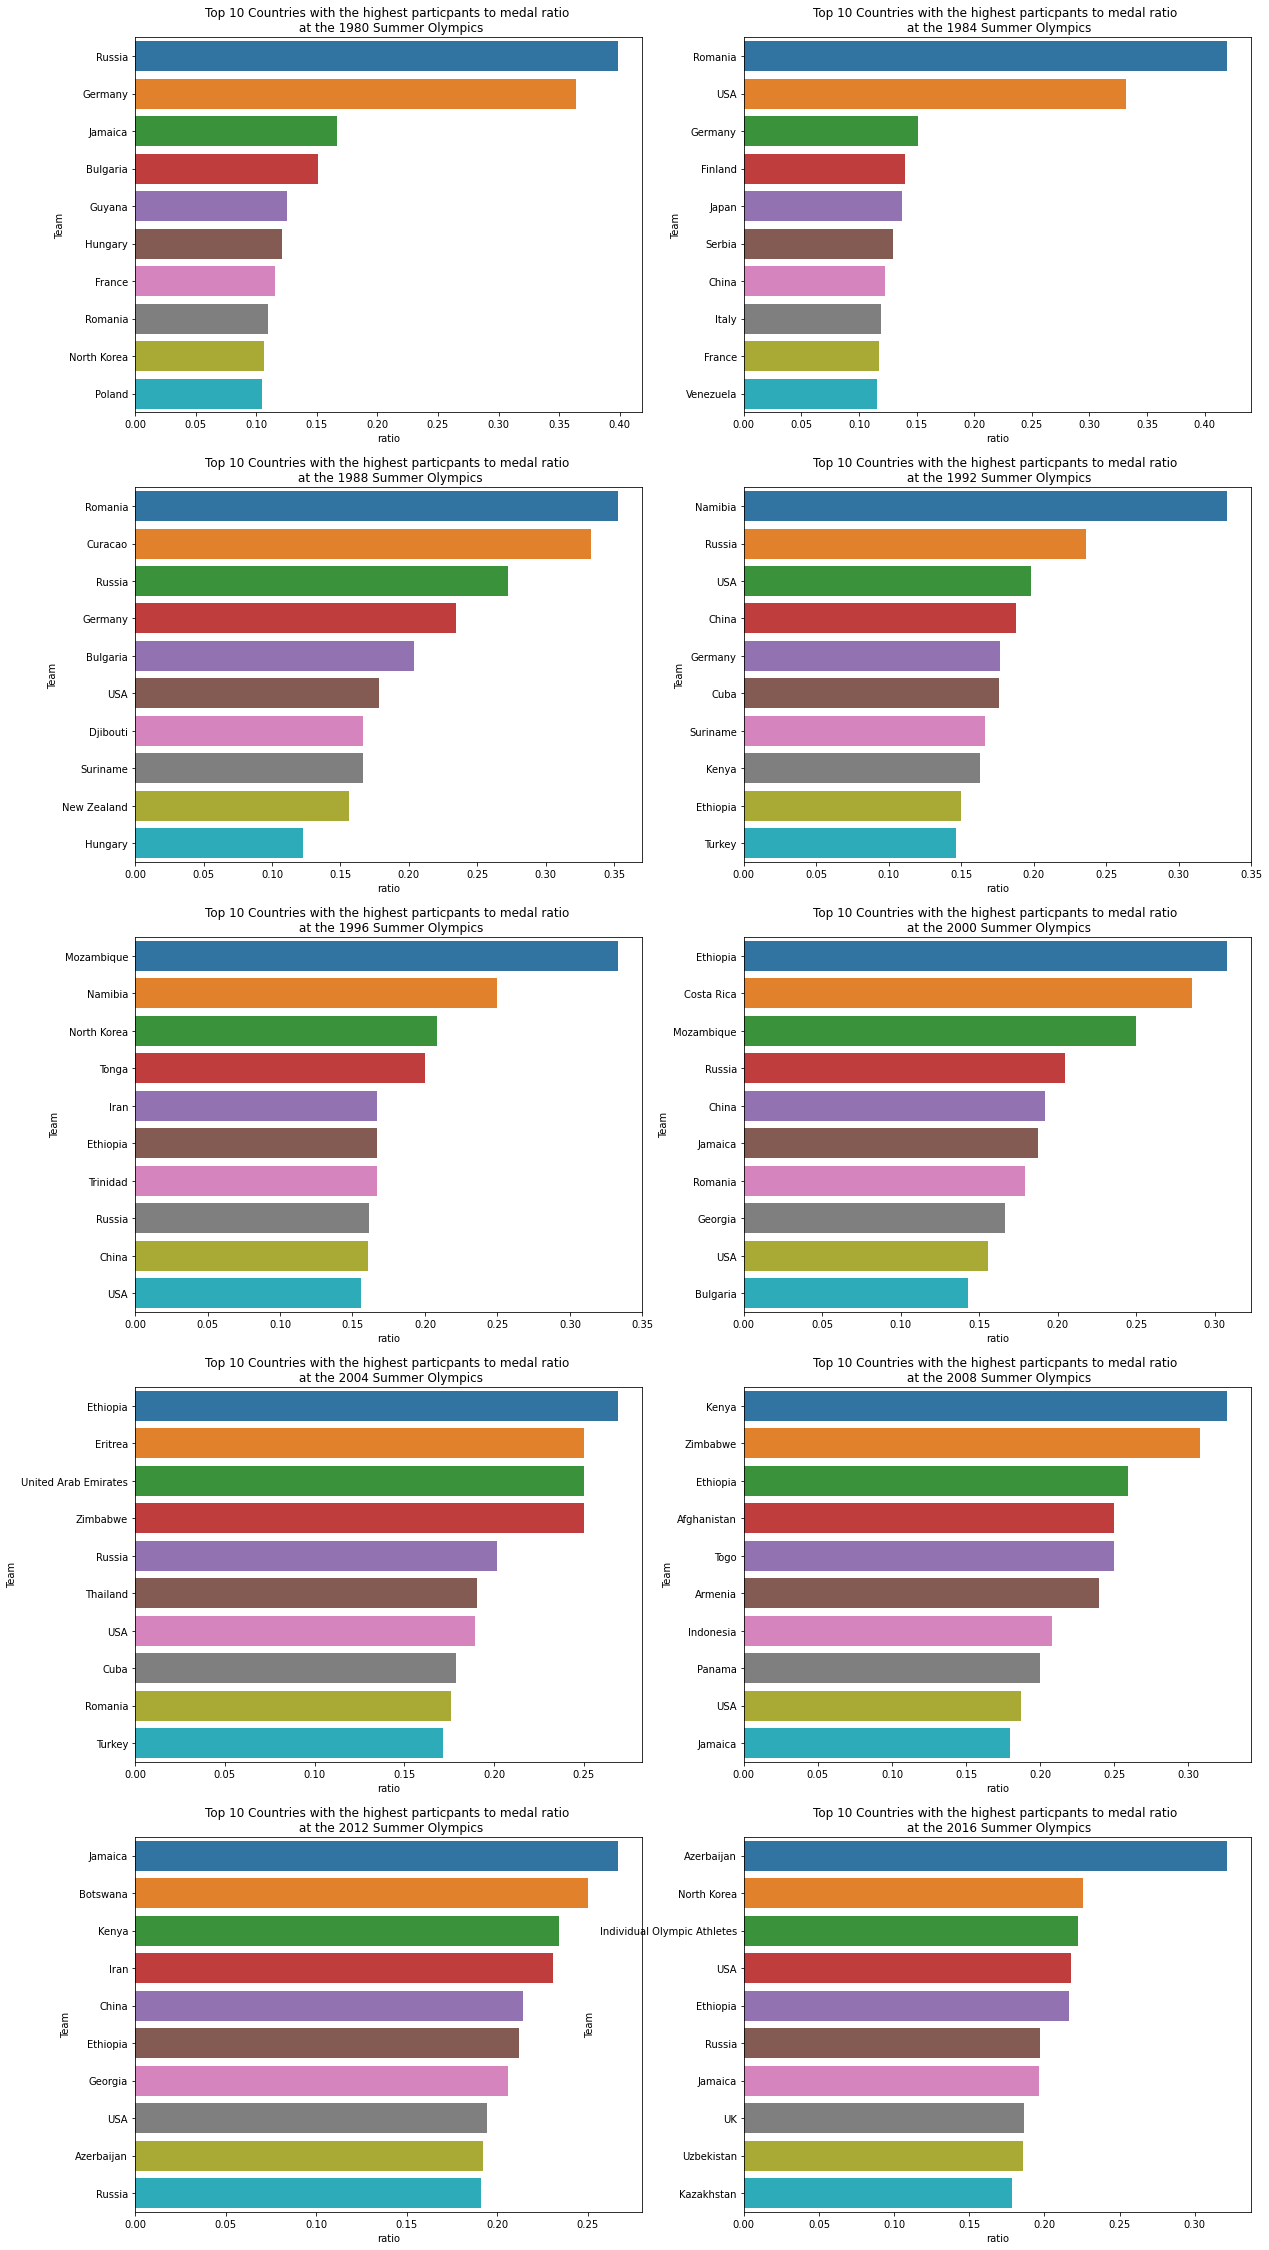

In [444]:
particpants = df_olympics_final[(df_olympics_final['Season'] == 'Summer')].groupby(['Year','Region','ID']).size()        
medal = NewMedalfilter[(NewMedalfilter['Season'] == 'Summer')].groupby(['Year','Region','Event'])["Medal"].nunique()

fig, axes = plt.subplots(nrows=5, ncols=2,figsize=(20,40))
indx = 0
years = [1980,1984,1988,1992,1996,2000,2004,2008,2012,2016]
# Iterating through axes and names
for ax in axes.flatten():

    df_ratio = MedalToParticipantsRatio(years[indx])
    highestRatio = df_ratio.nlargest(10, ['ratio'])
    ax.title.set_text('Top 10 Countries with the highest particpants to medal ratio \n at the %s Summer Olympics'%(years[indx]))
    sns.barplot(y = highestRatio['Team'], x=highestRatio['ratio'], data=df_ratio, ax=ax)
    indx+=1

### Research Question 11:  Which gender is more dominant in each country?

There is 206 different country that has participated in Winter or Summer Olympics over the years, but due to the large number of the available countries, we will only take into account the top 25 performing countries in terms of Medals achieved

In [445]:
filter2 = df_olympics_final[df_olympics_final['Medal'] != 0]
top25Medals = filter2.groupby(['Region'])['Medal'].count().nlargest(25)
topMedalCountries = df_olympics_final[df_olympics_final["Region"].isin(top25Medals.index)]
top25Medals.index

Index(['USA', 'Russia', 'Germany', 'UK', 'France', 'Italy', 'Sweden', 'Canada',
       'Australia', 'Hungary', 'Netherlands', 'Norway', 'China', 'Japan',
       'Finland', 'Switzerland', 'Romania', 'Czech Republic', 'South Korea',
       'Denmark', 'Poland', 'Serbia', 'Spain', 'Brazil', 'Belgium'],
      dtype='object', name='Region')

In [446]:
top25Countries = top25Medals.index

topMedalCountries = df_olympics_final[df_olympics_final['Region'].isin(top25Countries)]
topMedalCountries

males = topMedalCountries[topMedalCountries['Sex'] == 'M'].groupby(['Region']).size()
females = topMedalCountries[topMedalCountries['Sex'] == 'F'].groupby(['Region']).size()


males = males.reindex(top25Medals.index)
females = females.reindex(top25Medals.index)

medalists=topMedalCountries[topMedalCountries['Medal']!=0]
male_medals=medalists[medalists['Sex']=='M'].groupby(['Region'])['Medal'].count()
female_medals=medalists[medalists['Sex']=='F'].groupby(['Region'])['Medal'].count()

male_medals=male_medals.reindex(top25Medals.index)
female_medals=female_medals.reindex(top25Medals.index)

first we will see the number of participants from each gender to the top countries.

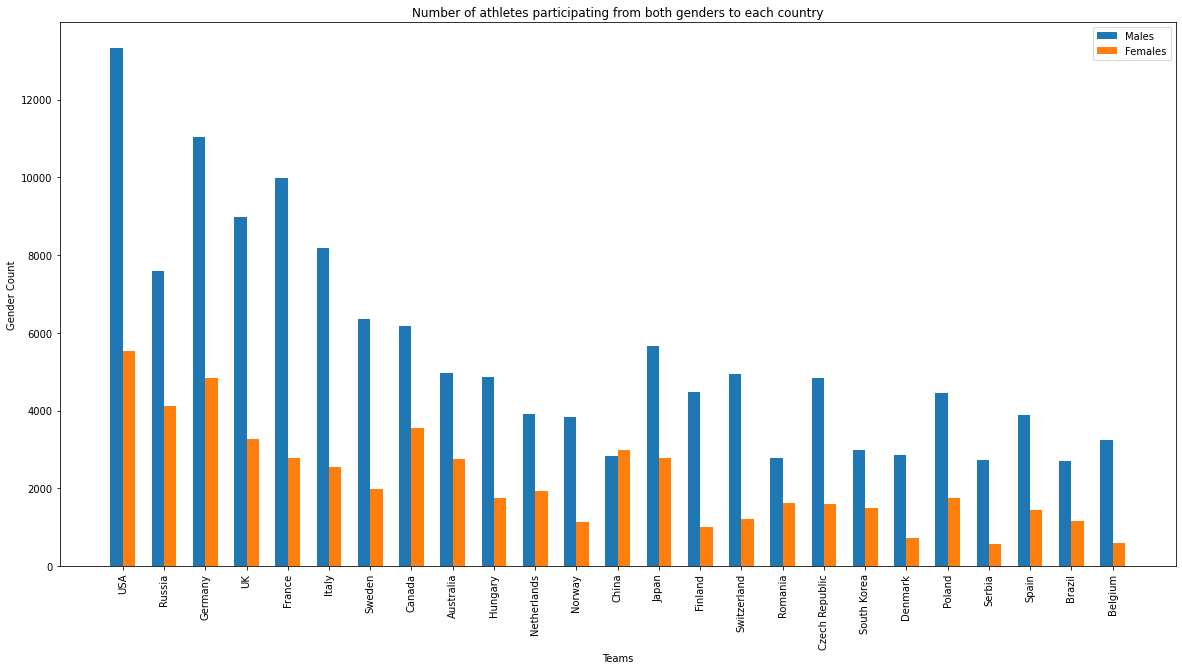

In [447]:
X_axis = np.arange(len(top25Countries))
plt.figure(figsize=(20,10))
plt.ylabel('Gender Count')
plt.xlabel('Teams')
plt.title("Number of athletes participating from both genders to each country")
plt.bar(X_axis - 0.15, males, 0.3, label = 'Males')
plt.bar(X_axis + 0.15, females, 0.3, label = 'Females')

plt.xticks(X_axis, top25Countries)
plt.xticks(rotation = 90, )
plt.legend()
plt.show()

Males are generally more in terms of numbers in almost every country of the twenty five countries top perfroming countries, but How well is every gender performing? that what's the next section is analyzing using the winrate instead of using the number of medals won by each gender since males participate more as we can see from the above figure, so we use the winrate in order to make it an unbiased analysis, and the winrate is calculated as medals won by each gender for the country divided by the number of athletes from this country for each gender.

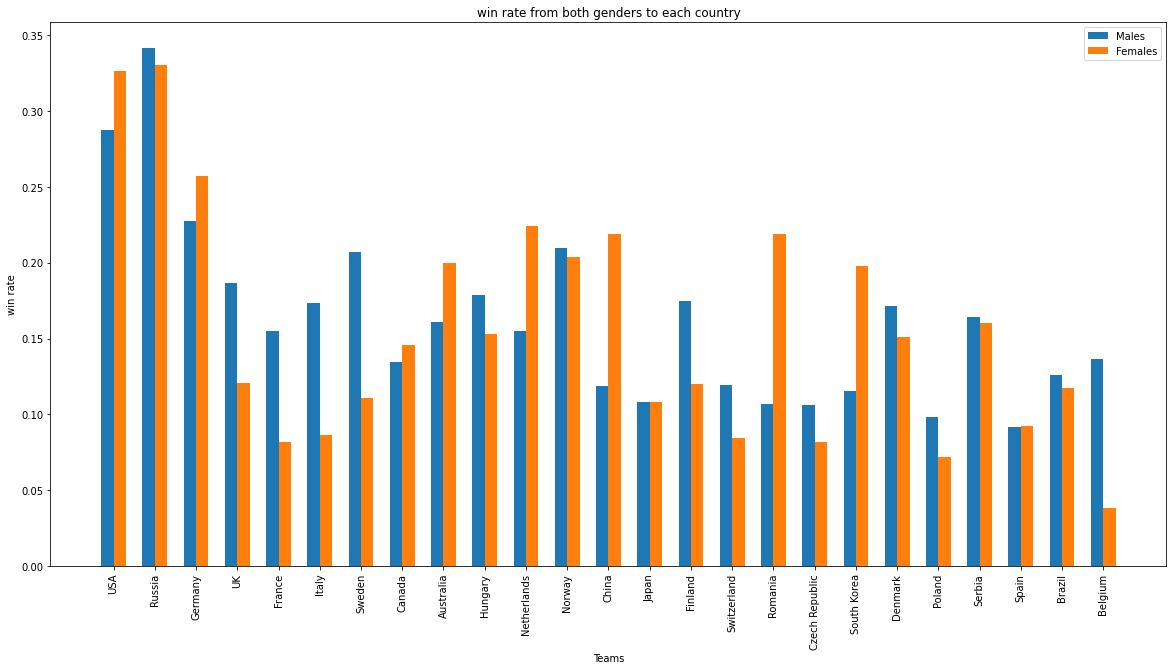

In [448]:
X_axis = np.arange(len(top25Countries))
plt.figure(figsize=(20,10))
plt.ylabel('win rate')
plt.xlabel('Teams')
plt.title("win rate from both genders to each country")
plt.bar(X_axis - 0.15, male_medals/males, 0.3, label = 'Males')
plt.bar(X_axis + 0.15, female_medals/females, 0.3, label = 'Females')

plt.xticks(X_axis, top25Countries)
plt.xticks(rotation = 90, )
plt.legend()
plt.show()

As we can see the results vary for each top country; some countries have a better winrate among their female athletes while other countries have a better winrate among their male athletes.